[![MastHead](MoVies.png)](https://www.youtube.com/@CodeBaseStats)

<div id="badges" style="text-align: center;">
  <a href="https://www.linkedin.com/in/abu--usama">
    <img src="https://img.shields.io/badge/LinkedIn-blue?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge"/>
  </a>
  <a href="https://www.facebook.com/profile.php?id=100005320726463&mibextid=9R9pXO">
    <img src="https://img.shields.io/badge/Facebook-blue?style=for-the-badge&logo=facebook&logoColor=white" alt="Facebook Badge"/>
  </a>
  <a href="https://www.youtube.com/@CodeBaseStats">
    <img src="https://img.shields.io/badge/YouTube-red?style=for-the-badge&logo=youtube&logoColor=white" alt="Youtube Badge"/>
  </a>
  <a href="https://twitter.com/Usama__Munawar?t=Wk-zJ88ybkEhYJpWMbMheg&s=09">
    <img src="https://img.shields.io/badge/Twitter-blue?style=for-the-badge&logo=twitter&logoColor=white" alt="Twitter Badge"/>
  </a>
</div>
<div id="badges" style="text-align: center;">
  <img src="https://komarev.com/ghpvc/?username=your-github-username&style=flat-square&color=blue" alt=""/>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.tools as tls  # Import mpl_to_plotly function
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Install openpyxl package
# %pip install openpyxl

# Load the dataset
sales_df = pd.read_excel("Adidas.xlsx", sheet_name="Sales")


### **Step 1: Understanding Your Dataset**
Your dataset (`Adidas.xlsx`) contains **sales data**, including:  
- `InvoiceDate` (Time series data)  
- `Retailer`, `Region`, `State`, `City` (Categorical data)  
- `Product`, `PriceperUnit`, `UnitsSold`, `TotalSales` (Numerical data)  
- `OperatingProfit`, `SalesMethod`  


In [3]:
# Convert InvoiceDate to datetime
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

In [4]:
# # Aggregate sales data by Retailer
# retailer_sales = sales_df.groupby('Retailer')['TotalSales'].sum().reset_index()
# print("Retailer-wise Sales:")
# print(retailer_sales)
# retailer_sales.to_csv("RetailerSales.csv", index=False)

# Aggregate sales data by Month-Year
sales_df["Month_Year"] = sales_df["InvoiceDate"].dt.strftime("%b'%y")
monthly_sales = sales_df.groupby("Month_Year")["TotalSales"].sum().reset_index()
# print("Monthly Sales:")
# print(monthly_sales)
# monthly_sales.to_csv("MonthlySales.csv", index=False)

### **Explanation of the Code (Step by Step with a Manual Example)**  

#### **2. Aggregate Total Sales by Month-Year**  
```python
monthly_sales = sales_df.groupby("Month_Year")["TotalSales"].sum().reset_index()
```
- This groups sales data by `Month_Year` and **sums the `TotalSales`** for each month.
- **Manual Example:**
  
| InvoiceDate  | TotalSales | Month_Year |
|-------------|-----------|------------|
| 2024-01-05  | 10,000    | Jan'24     |
| 2024-01-15  | 15,000    | Jan'24     |
| 2024-02-03  | 8,000     | Feb'24     |
| 2024-02-10  | 12,000    | Feb'24     |
| 2024-03-01  | 20,000    | Mar'24     |

➡️ **After Aggregation (`groupby` and `sum`)**:

| Month_Year | TotalSales |
|------------|------------|
| Jan'24     | 25,000     |
| Feb'24     | 20,000     |
| Mar'24     | 20,000     |




## **1. Line Plot (Time Series Analysis)** 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, "Apr'20"),
  Text(1, 0, "Apr'21"),
  Text(2, 0, "Aug'20"),
  Text(3, 0, "Aug'21"),
  Text(4, 0, "Dec'20"),
  Text(5, 0, "Dec'21"),
  Text(6, 0, "Feb'20"),
  Text(7, 0, "Feb'21"),
  Text(8, 0, "Jan'20"),
  Text(9, 0, "Jan'21"),
  Text(10, 0, "Jul'20"),
  Text(11, 0, "Jul'21"),
  Text(12, 0, "Jun'20"),
  Text(13, 0, "Jun'21"),
  Text(14, 0, "Mar'20"),
  Text(15, 0, "Mar'21"),
  Text(16, 0, "May'20"),
  Text(17, 0, "May'21"),
  Text(18, 0, "Nov'20"),
  Text(19, 0, "Nov'21"),
  Text(20, 0, "Oct'20"),
  Text(21, 0, "Oct'21"),
  Text(22, 0, "Sep'20"),
  Text(23, 0, "Sep'21")])

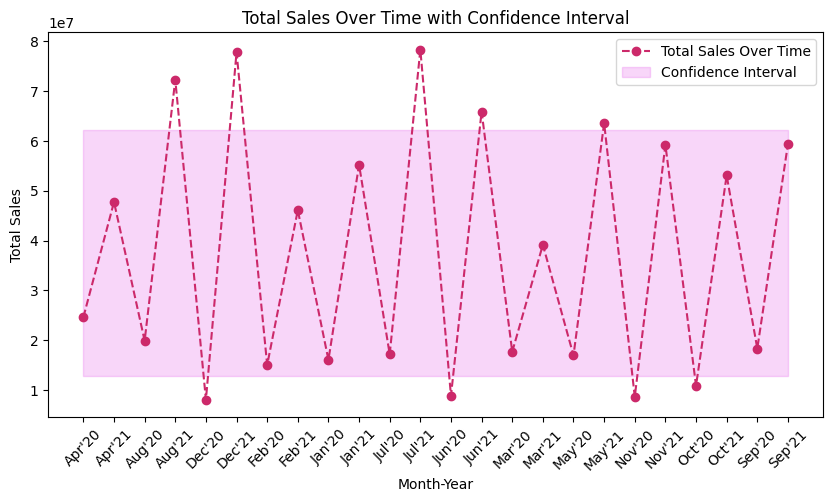

In [5]:
# Create a Matplotlib time series plot with confidence interval
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(monthly_sales['Month_Year'], monthly_sales['TotalSales'], label='Total Sales Over Time', color='#cc296a', linestyle='--', marker='o')

# Compute confidence interval
y_mean = monthly_sales['TotalSales'].mean()
y_std = monthly_sales['TotalSales'].std()
ax.fill_between(monthly_sales['Month_Year'], y_mean - y_std, y_mean + y_std, color='#dd32e3', alpha=0.2, label='Confidence Interval')

ax.set_xlabel("Month-Year")
ax.set_ylabel("Total Sales")
ax.set_title("Total Sales Over Time with Confidence Interval")
ax.legend()
plt.xticks(rotation=45)




## **2. Bar Plot (Categorical Data Analysis)**

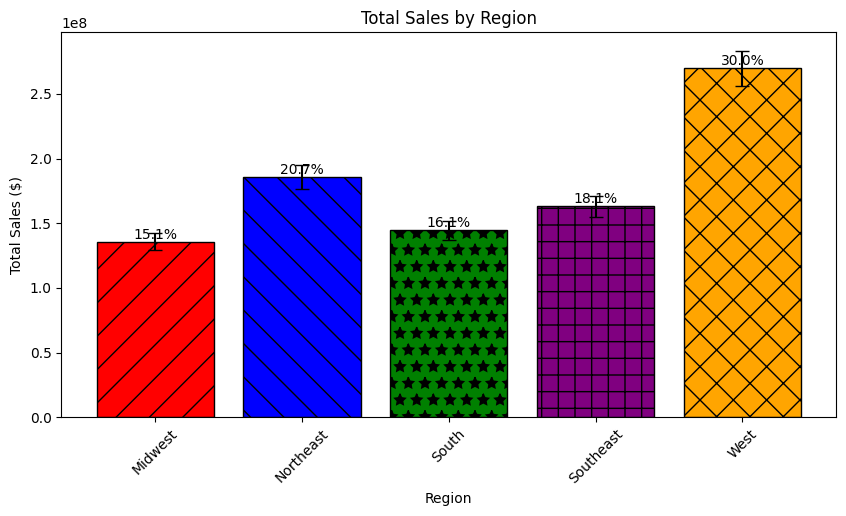

In [6]:

# Aggregate sales data by Region
region_sales = sales_df.groupby('Region')['TotalSales'].sum().reset_index()

# Define colors and hatch patterns
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
hatch_patterns = ['/', '\\', '*', '+', 'x', '-']
error = region_sales['TotalSales'] * 0.05  # Assuming 5% error margin

# Create a bar chart visualizing Total Sales by Region
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(region_sales['Region'], region_sales['TotalSales'], yerr=error, capsize=5, color=colors, edgecolor='black')

# Add hatch patterns
for bar, hatch in zip(bars, hatch_patterns):
    bar.set_hatch(hatch)

# Add percentage labels on bars
total_sales = sum(region_sales['TotalSales'])
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sales) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

ax.set_xlabel("Region")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()



## **🔹 1. Aggregate Total Sales by Region**
```python
region_sales = sales_df.groupby('Region')['TotalSales'].sum().reset_index()
```
- Groups the data **by Region** and calculates the **total sales per region**.  
- **Example Input Data:**

| Region         | InvoiceDate | TotalSales |
|---------------|------------|------------|
| North America | 2024-01-01 | 100,000    |
| North America | 2024-01-05 | 120,000    |
| Europe        | 2024-01-02 | 90,000     |
| Europe        | 2024-01-06 | 110,000    |

- **After `groupby('Region')['TotalSales'].sum()` → Aggregated Data:**
  
| Region         | TotalSales |
|---------------|------------|
| North America | 220,000    |
| Europe        | 200,000    |

---

## **🔹 2. Define Custom Colors, Hatch Patterns, and Error Bars**
```python
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
hatch_patterns = ['/', '\\', '|', '-', '+', 'x']
error = region_sales['TotalSales'] * 0.05  # Assuming 5% error margin
```
- **`colors`** → List of colors assigned to each bar in the chart.  
- **`hatch_patterns`** → Different hatch styles (`/`, `\`, `|`, `-`, `+`, `x`) used to create texture patterns on bars.  
- **`error`** → Represents an **assumed 5% margin of error** for sales values.

### **2️⃣ Calculation for Error Bars**
Error bars represent a **margin of uncertainty**.  
We assume a **5% error** in Total Sales for each region.

**Formula Used:**
$$ \text{Error} = \text{Total Sales} \times 0.05 $$



#### **Example: Europe**
- Suppose **Europe’s Total Sales** = **200,000**  
- **Error Margin (5%)**:
  
  $$ 200,000 \times 0.05 = 10,000 $$


  
- **This means that the error bar extends ±10,000 above and below the bar for Europe.**


### **✅ Summary**
- **Percentage Labels** show the proportion of sales each region contributes.  
- **Error Bars** visualize uncertainty by extending above and below each bar

---

## **🔹 3. Create the Bar Chart**
```python
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(region_sales['Region'], region_sales['TotalSales'], yerr=error, capsize=5, color=colors, edgecolor='black')
```
- **Creates a Matplotlib figure (`fig`) and an axis (`ax`).**  
- **Plots the bar chart:**
  - **X-axis** → `Region`
  - **Y-axis** → `TotalSales`
  - **Error bars** → Represented using `yerr=error`  
  - **Capsize=5** → Controls the size of the error bar caps.
  - **Colors and black edges applied** for better visualization.

---

## **🔹 4. Apply Hatch Patterns**
```python
for bar, hatch in zip(bars, hatch_patterns):
    bar.set_hatch(hatch)
```
- **Loops through each bar** in the chart and assigns a **hatch pattern** from the `hatch_patterns` list.
- Hatch patterns help differentiate bars visually **without relying on colors alone**.

---

## **🔹 5. Add Percentage Labels on Bars**
```python
total_sales = sum(region_sales['TotalSales'])
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_sales) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
```
- **Calculates total sales** across all regions.  
- **Loops through each bar:**
  - Extracts its **height** (sales value).
  - Computes its **percentage** relative to total sales.
  - Adds the **percentage label** on top of the bar using `ax.text()`.



### **1️⃣ Calculation for Percentage Labels on Bars**
**Formula Used:**
$$
\text{Percentage} = \left(\frac{\text{Total Sales of Region}}{\text{Total Sales of All Regions}}\right) \times 100
$$

#### **Example: North America**
- Suppose **North America’s Total Sales** = **220,000**  
- **Total Sales across all Regions** = **1,000,000**  
- Applying the formula:
  
  $$ \left(\frac{220,000}{1,000,000}\right) \times 100 = 22\% $$

  
- **This means that the label "22%" is displayed above the bar for North America.**

---

## **🔹 6. Customize Axis Labels and Title**
```python
ax.set_xlabel("Region")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()
```
- **`set_xlabel("Region")`** → Labels the X-axis.  
- **`set_ylabel("Total Sales ($)")`** → Labels the Y-axis.  
- **`set_title("Total Sales by Region")`** → Adds a chart title.  
- **`plt.xticks(rotation=45)`** → Rotates the x-axis labels for better readability.  
- **`plt.show()`** → Displays the final bar chart.  

---

## **📌 Final Output**
This code **generates a well-structured bar chart** with:
✅ **Different colors** for each region  
✅ **Hatch patterns** for better visibility  
✅ **Error bars** showing a 5% margin of uncertainty  
✅ **Percentage labels** on each bar  
✅ **Clear axis labels and a title**  

---

## **🔹 Example Visualization (Manually Explained)**
| Region         | Total Sales | % of Total Sales | Hatch Pattern |
|---------------|------------|------------------|--------------|
| North America | 220,000    | 22.0%            | `/`          |
| Europe        | 200,000    | 20.0%            | `\`          |
| Asia          | 300,000    | 30.0%            | `|`          |
| South America | 150,000    | 15.0%            | `-`          |
| Africa        | 80,000     | 8.0%             | `+`          |
| Oceania       | 50,000     | 5.0%             | `x`          |

---

## **3. Histogram & KDE (Data Distribution Analysis)** 

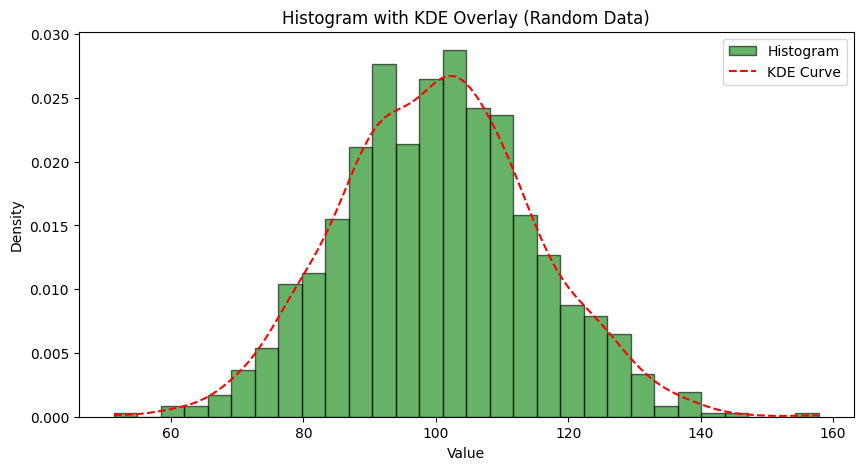

In [7]:
from scipy.stats import gaussian_kde
# Generate a dataset of 1000 random values from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)

# Plot histogram with KDE overlay using Matplotlib only
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Histogram
counts, bins, patches = ax.hist(data, bins=30, density=True, color='green', edgecolor='black', alpha=0.6, label='Histogram')

# Compute KDE manually
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 100)
kde_vals = kde(x_vals)
ax.plot(x_vals, kde_vals, color='red', linestyle='--', label='KDE Curve')

ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Histogram with KDE Overlay (Random Data)")
ax.legend()
plt.show()

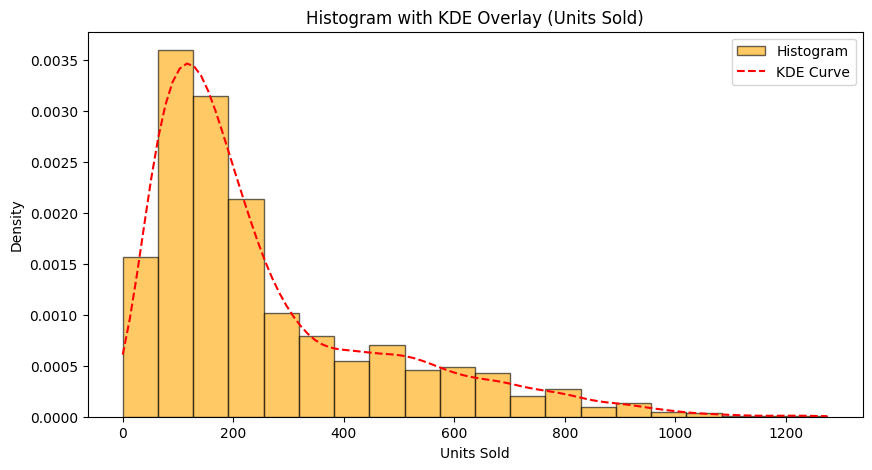

In [8]:
# Plot histogram for Units Sold from the dataset with KDE overlay
fig, ax = plt.subplots(figsize=(10, 5))
counts, bins, patches = ax.hist(sales_df['UnitsSold'], bins=20, density=True, color='orange', edgecolor='black', alpha=0.6, label='Histogram')

# Compute KDE for Units Sold
kde_units = gaussian_kde(sales_df['UnitsSold'].dropna())
x_vals_units = np.linspace(min(sales_df['UnitsSold']), max(sales_df['UnitsSold']), 100)
kde_vals_units = kde_units(x_vals_units)
ax.plot(x_vals_units, kde_vals_units, color='red', linestyle='--', label='KDE Curve')

ax.set_xlabel("Units Sold")
ax.set_ylabel("Density")
ax.set_title("Histogram with KDE Overlay (Units Sold)")
ax.legend()
plt.show()


### **📌 Explanation of the Code: Histogram & KDE Overlay**

This code **creates two histograms**:
1. **Histogram of Randomly Generated Data** (1000 values from a normal distribution).  
2. **Histogram of "Units Sold" from the Adidas Sales Dataset**, both with **KDE (Kernel Density Estimation) Overlay**.

---

## **🔹 1. Generating a Random Dataset**
```python
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)
```
- **`np.random.seed(42)`** → Ensures reproducibility; every time you run the script, the same random numbers are generated.  
- **`np.random.normal(loc=100, scale=15, size=1000)`** → Generates **1000 random values** from a **normal distribution**:
  - `loc=100` → Mean of 100  
  - `scale=15` → Standard deviation of 15  
  - `size=1000` → 1000 random values  
---
## **🔹 2. Plotting a Histogram with KDE Overlay**
```python
fig, ax = plt.subplots(figsize=(10, 5))
counts, bins, patches = ax.hist(data, bins=30, density=True, color='blue', edgecolor='black', alpha=0.6, label='Histogram')
```
- **`plt.subplots(figsize=(10, 5))`** → Creates a figure and axes for the plot.  
- **`ax.hist(data, bins=30, density=True, ...)`** → Creates a **histogram**:
  - `bins=30` → Splits the data into **30 bins** (adjustable).  
  - `density=True` → Normalizes the histogram so it **matches the probability density function (PDF)**.  
  - `color='blue'` → Fills the bars with blue color.  
  - `edgecolor='black'` → Adds black edges to the bars.  
  - `alpha=0.6` → Sets transparency to **60%**.  
  - `label='Histogram'` → Adds a label for the legend. 
### **📌 Manual Calculation for `density=True` in Histogram**  

When we set `density=True` in a histogram, we **normalize** the histogram bars so that the **total area under the histogram is 1**. This makes the histogram **comparable to a probability density function (PDF)**.


#### **1️⃣ Understanding How a Histogram Works**  
A **histogram** divides data into **bins** and counts how many values fall into each bin.

### **Sample Data (Choosing Small Values)**
Let's assume we have **10 values**:

$$
[5, 6, 7, 8, 9, 10, 10, 11, 12, 13]
$$

- **Minimum value** = **5**  
- **Maximum value** = **13**  
- **Total number of values (n)** = **10**  
- **Choose 4 bins** to divide this data:  
  - **Bin 1**: (5-7)  
  - **Bin 2**: (7-9)  
  - **Bin 3**: (9-11)  
  - **Bin 4**: (11-13)  

Now, count **how many values fall into each bin**:

| Bin Range | Count (Number of Values) |
|-----------|-------------------------|
| 5 - 7     | 3  (**5, 6, 7**)        |
| 7 - 9     | 2  (**8, 9**)           |
| 9 - 11    | 3  (**10, 10, 11**)     |
| 11 - 13   | 2  (**12, 13**)         |

#### **Step 1: Compute Bin Width**
Bin width is calculated as:

$$
\text{Bin Width} = \frac{\max - \min}{\text{Number of Bins}} = \frac{13 - 5}{4} = 2
$$

#### **2️⃣ Compute Normalized Density for Each Bin**
Instead of showing raw counts, we calculate the **density** for each bin using:

$$
\text{Density} = \frac{\text{Count in Bin}}{\text{Total Count} \times \text{Bin Width}}
$$

Now, apply this formula for each bin:

| Bin Range | Count | Density Calculation |
|-----------|--------|--------------------------------------|
| **5 - 7** | 3 | $$\frac{3}{10 \times 2} = 0.15 $$ |
| **7 - 9** | 2 | $$ \frac{2}{10 \times 2} = 0.10 $$ |
| **9 - 11** | 3 | $$ \frac{3}{10 \times 2} = 0.15 $$ |
| **11 - 13** | 2 | $$\frac{2}{10 \times 2} = 0.10 $$ |  

So, instead of plotting **counts**, we now plot these **densities** on the Y-axis.

---

## **🔹 3. Adding KDE (Kernel Density Estimation)**
```python
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 100)
kde_vals = kde(x_vals)
ax.plot(x_vals, kde_vals, color='red', linestyle='--', label='KDE Curve')
```
- **`gaussian_kde(data)`** → Creates a **smoothed density curve** from our dataset.  
- **`np.linspace(min(data), max(data), 100)`** → Creates **100 evenly spaced values** between **min & max values of data**.  
- **`ax.plot(x_vals, kde_vals, color='red', linestyle='--', label='KDE Curve')`** → Plots the **KDE curve**:
  - `color='red'` → Red line  
  - `linestyle='--'` → Dashed  
  - `label='KDE Curve'` → For the legend  

This **KDE curve** smooths the histogram into a continuous curve, making it easier to visualize data distribution.

#### **2️⃣ Manual KDE Calculation for "Units Sold"**
Let’s assume **5 sales data points** from `"Units Sold"`:  
$$
[10, 20, 25, 30, 40]
$$
Now, we estimate **density at `x = 28`**.

### **Step 1: Compute Distance from `x = 28`**
For each data point $$ x_i $$, compute:
$$
\frac{x - x_i}{h}
$$
Let’s assume **h = 5**:

| Data Point $$ x_i $$ | Distance $$ 28 - x_i $$ | Scaled Distance $$ \frac{28 - x_i}{h} $$ |
|----------------|--------------------|--------------------------------|
| 10            | $$ 28 - 10 = 18 $$  | $$ \frac{18}{5} = 3.6 $$       |
| 20            | $$ 28 - 20 = 8 $$   | $$ \frac{8}{5} = 1.6 $$        |
| 25            | $$ 28 - 25 = 3 $$   | $$ \frac{3}{5} = 0.6 $$        |
| 30            | $$ 28 - 30 = -2 $$  | $$ \frac{-2}{5} = -0.4 $$      |
| 40            | $$ 28 - 40 = -12 $$ | $$ \frac{-12}{5} = -2.4 $$     |



#### **Step 2: Apply Gaussian Kernel Function**
The Gaussian Kernel function is:

$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
$$

We apply this to each **scaled distance**:

| $$ u $$ | $$ e^{-u^2/2} $$ | $$ K(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2} $$ |
|------|----------------|--------------------------------|
| 3.6  | $$ e^{-6.48} \approx 0.0015 $$ | $$ \frac{0.0015}{\sqrt{2\pi}} \approx 0.0006 $$ |
| 1.6  | $$ e^{-1.28} \approx 0.278 $$ | $$ \frac{0.278}{\sqrt{2\pi}} \approx 0.11 $$ |
| 0.6  | $$ e^{-0.18} \approx 0.835 $$ | $$ \frac{0.835}{\sqrt{2\pi}} \approx 0.33 $$ |
| -0.4 | $$ e^{-0.08} \approx 0.923 $$ | $$ \frac{0.923}{\sqrt{2\pi}} \approx 0.37 $$ |
| -2.4 | $$ e^{-2.88} \approx 0.056 $$ | $$ \frac{0.056}{\sqrt{2\pi}} \approx 0.022 $$ |



#### **Step 3: Compute KDE Estimate**
Now, sum up all kernel values and divide by **n * h**:

$$
\hat{f}(28) = \frac{1}{5(5)} \sum_{i=1}^{5} K\left(\frac{28 - x_i}{5}\right)
$$

Substituting values:

$$
\hat{f}(28) = \frac{1}{25} (0.0006 + 0.11 + 0.33 + 0.37 + 0.022)
$$

$$
= \frac{1}{25} (0.8326)
$$

$$
= 0.0333
$$

Thus, **KDE estimate at `x = 28` is 0.0333**.












## **4. Scatter Plot with Color Mapping (Multivariate Analysis)** 

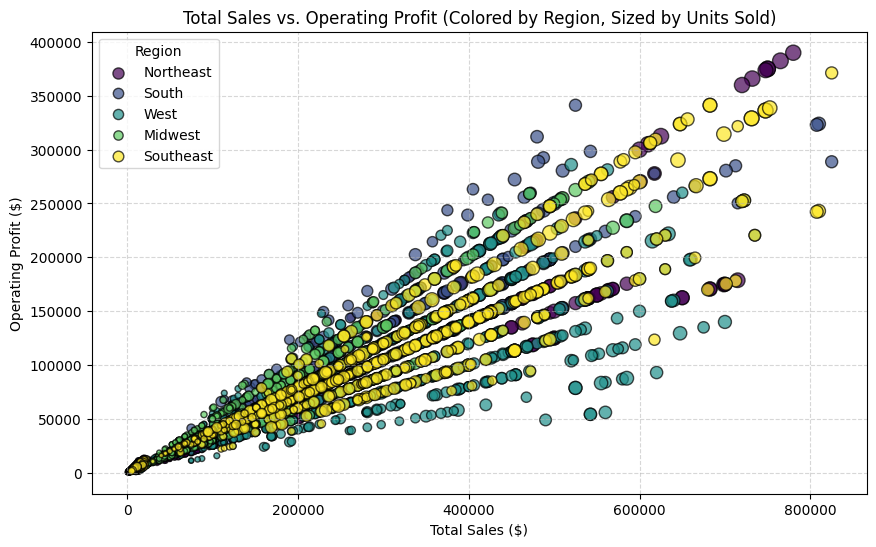

In [9]:
# Function to create a scatter plot with color mapping and marker sizing
def plot_scatter_sales_profit(sales_df):
    """
    This function creates a scatter plot of Total Sales vs. Operating Profit.
    - Colors represent different Regions.
    - Marker sizes are based on Units Sold.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define unique regions and assign colors
    unique_regions = sales_df['Region'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_regions)))
    region_color_map = dict(zip(unique_regions, colors))
    
    # Scatter plot
    for region in unique_regions:
        subset = sales_df[sales_df['Region'] == region]
        ax.scatter(subset['TotalSales'], subset['OperatingProfit'], 
                   s=subset['UnitsSold'] / 10,  # Scale marker size
                   color=region_color_map[region], label=region, alpha=0.7, edgecolors='black')
    
    ax.set_xlabel("Total Sales ($)")
    ax.set_ylabel("Operating Profit ($)")
    ax.set_title("Total Sales vs. Operating Profit (Colored by Region, Sized by Units Sold)")
    ax.legend(title="Region")
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Call function to plot scatter plot
plot_scatter_sales_profit(sales_df)

In [10]:
# pip install --upgrade nbformat

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat


# Ensure nbformat is installed
# %pip install nbformat

# Function to create an interactive scatter plot
def plot_interactive_scatter(sales_df):
    fig = px.scatter(
        sales_df, 
        x="TotalSales", 
        y="OperatingProfit", 
        size="UnitsSold", 
        color="Region", 
        hover_name="Retailer", 
        hover_data={"TotalSales": True, "OperatingProfit": True, "UnitsSold": True, "Region": True, "Retailer": True},
        title="📊 Interactive Total Sales vs. Operating Profit",
        labels={"TotalSales": "Total Sales ($)", "OperatingProfit": "Operating Profit ($)", "UnitsSold": "Units Sold"},
        template="plotly_dark"
    )
    
    # Improve marker visibility with better contrast
    fig.update_traces(marker=dict(line=dict(width=2, color='Black')))
    
    # Improve layout
    fig.update_layout(
        legend_title_text="Region", 
        hovermode="closest",
        title=dict(font=dict(size=20, color="white")),
        xaxis=dict(title_font=dict(size=14, color="white")),
        yaxis=dict(title_font=dict(size=14, color="white"))
    )
    
    fig.show()

# Call function to plot interactive scatter plot
plot_interactive_scatter(sales_df)


### **📌 Explanation of Scatter Plot Code (Total Sales vs. Operating Profit)**  

This function creates a **scatter plot** where:  
✅ **X-axis** → `"Total Sales"`  
✅ **Y-axis** → `"Operating Profit"`  
✅ **Point Colors** → Represent `"Region"`  
✅ **Point Sizes** → Represent `"Units Sold"`  

---

## **1️⃣ Code Breakdown: Step-by-Step Explanation**  

### **Step 1: Define the Function**
```python
def plot_scatter_sales_profit(sales_df):
    """
    This function creates a scatter plot of Total Sales vs. Operating Profit.
    - Colors represent different Regions.
    - Marker sizes are based on Units Sold.
    """
```
- **Creates a function** `plot_scatter_sales_profit(sales_df)` that accepts a dataset (`sales_df`).  
- **Docstring (`"""..."""`)** explains what the function does.  

---

### **Step 2: Create Figure and Axis**
```python
fig, ax = plt.subplots(figsize=(10, 6))
```
- **`plt.subplots(figsize=(10, 6))`** → Creates a figure (`fig`) and axis (`ax`) for plotting.
- **`figsize=(10,6)`** → Sets the plot size (width=10, height=6).  

---

### **Step 3: Assign Colors to Regions**
```python
unique_regions = sales_df['Region'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_regions)))
region_color_map = dict(zip(unique_regions, colors))
```
#### **What Happens Here?**
1️⃣ **Finds unique regions** in the dataset (`sales_df['Region'].unique()`).  
2️⃣ **Generates distinct colors** for each region using the `viridis` colormap.  
3️⃣ **Creates a dictionary (`region_color_map`)** that maps each region to a color.  

#### **Manual Example**
If our dataset has **3 unique regions**:
```
['North America', 'Europe', 'Asia']
```
Then:
```
unique_regions = ['North America', 'Europe', 'Asia']
colors = [Color1, Color2, Color3]  # Generated from plt.cm.viridis
region_color_map = {'North America': Color1, 'Europe': Color2, 'Asia': Color3}
```

---

### **Step 4: Create the Scatter Plot**
```python
for region in unique_regions:
    subset = sales_df[sales_df['Region'] == region]
    ax.scatter(subset['TotalSales'], subset['OperatingProfit'], 
               s=subset['UnitsSold'] / 10,  # Scale marker size
               color=region_color_map[region], label=region, alpha=0.7, edgecolors='black')
```
#### **What Happens Here?**
1️⃣ **Loops through each region** (e.g., `"North America"`, `"Europe"`, etc.).  
2️⃣ **Filters dataset** for that region (`subset = sales_df[sales_df['Region'] == region]`).  
3️⃣ **Creates a scatter plot (`ax.scatter()`)** for that region.  

---

### **Step 5: Scatter Plot Parameters**
```python
ax.scatter(subset['TotalSales'], subset['OperatingProfit'], 
           s=subset['UnitsSold'] / 10,  # Scale marker size
           color=region_color_map[region], label=region, alpha=0.7, edgecolors='black')
```
| **Parameter** | **What It Does** |
|--------------|-----------------|
| `subset['TotalSales']` | X-axis: Total Sales |
| `subset['OperatingProfit']` | Y-axis: Operating Profit |
| `s=subset['UnitsSold'] / 10` | Marker size based on **Units Sold** (scaled down by `/10`) |
| `color=region_color_map[region]` | Assigns a **unique color per region** |
| `label=region` | Adds a **legend label** for the region |
| `alpha=0.7` | Sets **transparency** to 70% |
| `edgecolors='black'` | Adds **black edges** to points for visibility |

#### **Manual Example**
If **North America** has these values:

| **Total Sales** | **Operating Profit** | **Units Sold** |
|---------------|------------------|------------|
| 500,000      | 100,000          | 3,000      |
| 600,000      | 150,000          | 4,000      |

The scatter plot would:
- Plot **(500,000, 100,000)** with size `3000/10 = 300`
- Plot **(600,000, 150,000)** with size `4000/10 = 400`

---

### **Step 6: Customize Axes and Title**
```python
ax.set_xlabel("Total Sales ($)")
ax.set_ylabel("Operating Profit ($)")
ax.set_title("Total Sales vs. Operating Profit (Colored by Region, Sized by Units Sold)")
```
- **Labels the X-axis:** `"Total Sales ($)"`  
- **Labels the Y-axis:** `"Operating Profit ($)"`  
- **Adds a title:** `"Total Sales vs. Operating Profit (Colored by Region, Sized by Units Sold)"`  

---

### **Step 7: Add Legend and Grid**
```python
ax.legend(title="Region")
ax.grid(True, linestyle='--', alpha=0.5)
```
- **`ax.legend(title="Region")`** → Adds a **legend** showing color-coded regions.  
- **`ax.grid(True, linestyle='--', alpha=0.5)`** → Adds a **dashed grid with 50% transparency**.  

---

### **Step 8: Display the Plot**
```python
plt.show()
```
- Displays the **scatter plot**.

---

## **📌 Manual Walkthrough Example**
Let’s assume our dataset contains these values:

| **Region** | **Total Sales ($)** | **Operating Profit ($)** | **Units Sold** |
|-----------|----------------|------------------|-------------|
| North America | 500,000 | 100,000 | 3,000 |
| North America | 600,000 | 150,000 | 4,000 |
| Europe | 450,000 | 120,000 | 2,500 |
| Europe | 550,000 | 160,000 | 3,200 |
| Asia | 700,000 | 180,000 | 5,000 |

For each **region**, the function:
1. **Filters data** → North America, Europe, Asia.
2. **Assigns colors** → Different colors per region.
3. **Plots points**:
   - (500,000, 100,000) → Size **300**
   - (600,000, 150,000) → Size **400**
   - (450,000, 120,000) → Size **250**
   - (550,000, 160,000) → Size **320**
   - (700,000, 180,000) → Size **500**

**Final output:**
- **Different colors for each region**.
- **Bigger circles for higher "Units Sold"**.
- **Proper labeling and grid lines**.

---

## **✅ Summary**
🔹 **Scatter plot of `"Total Sales"` vs `"Operating Profit"`**.  
🔹 **Regions are color-coded** 🎨.  
🔹 **Point sizes represent `"Units Sold"`** 📦.  
🔹 **Customized styling for better readability**.  

---



## **5. Box Plot (Outlier Detection & Data Distribution)**

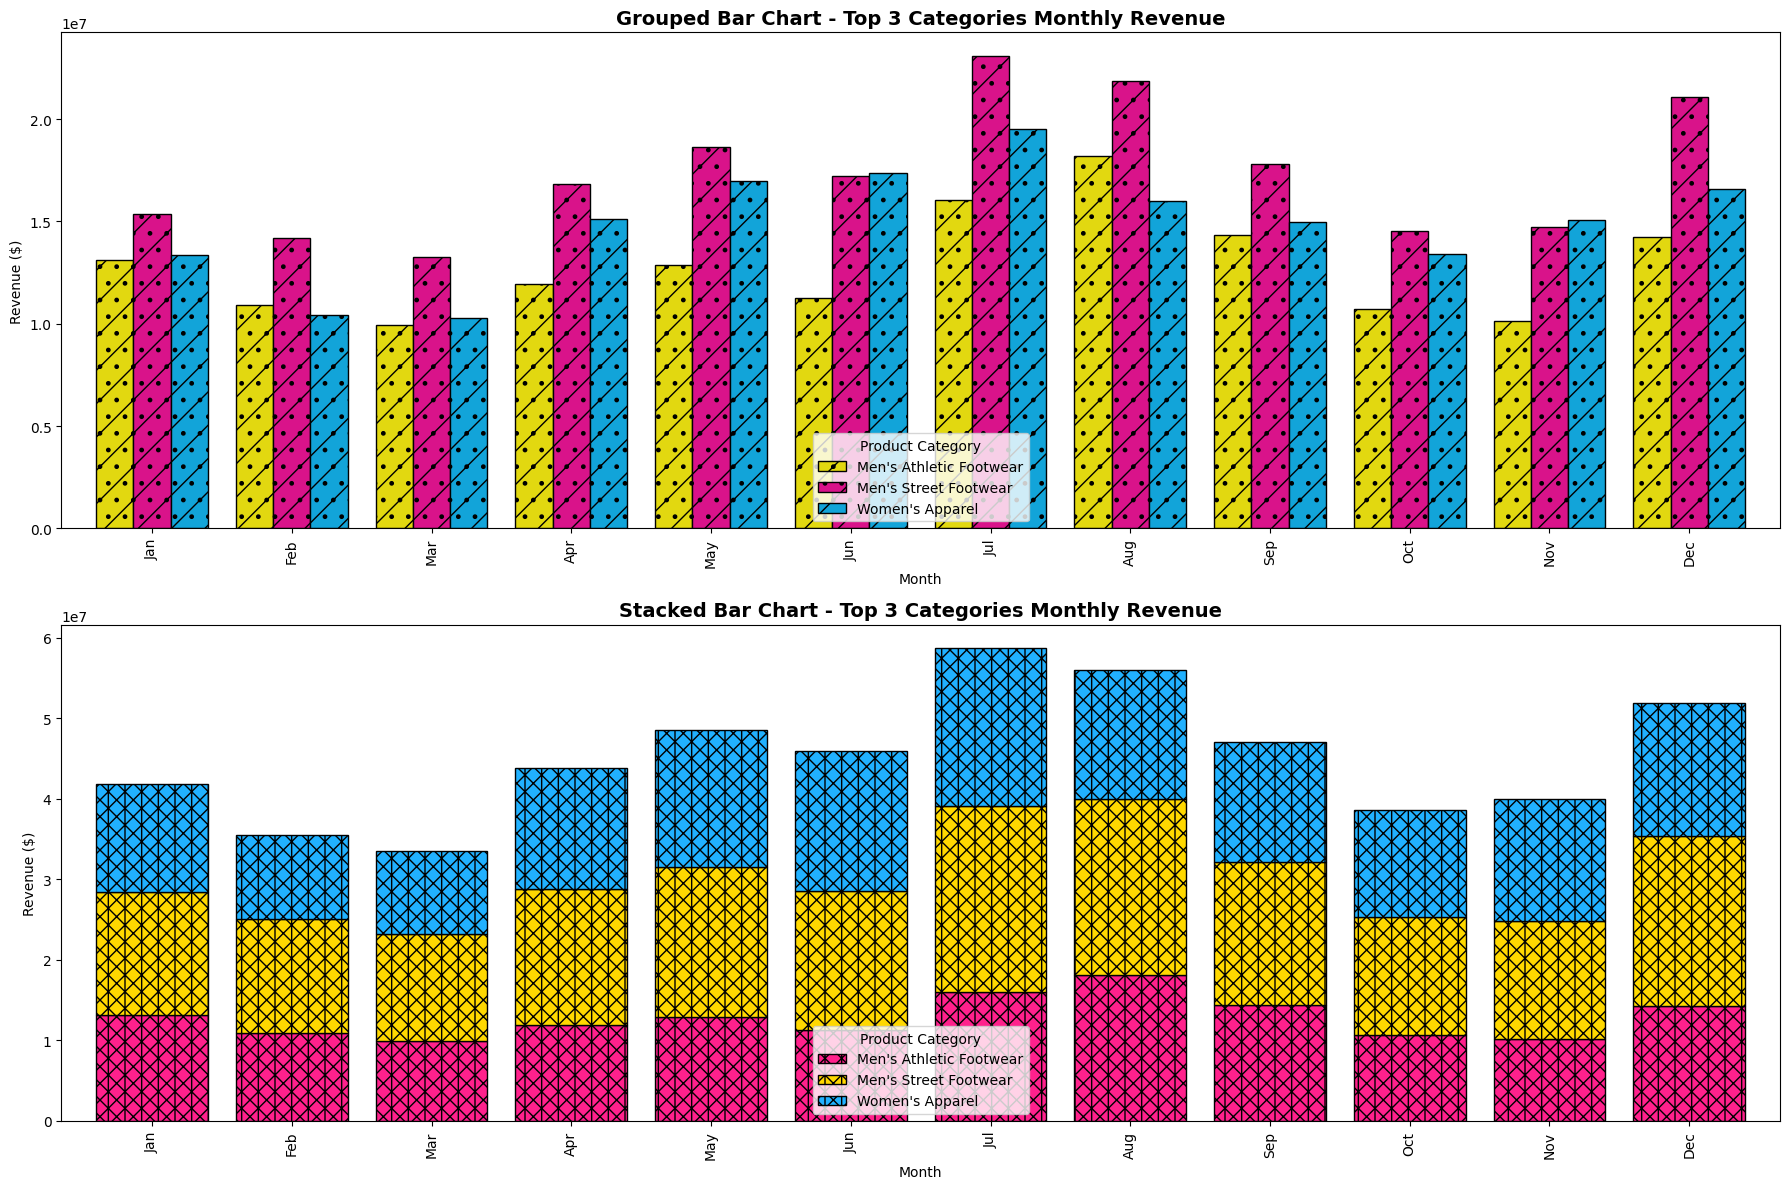

In [12]:
# Function to create grouped and stacked bar charts for top 3 categories
def plot_grouped_stacked_bar(sales_df):
    """
    This function creates grouped and stacked bar charts for the top 3 product categories based on total sales.
    """
    # Aggregate total sales by category
    top_categories = sales_df.groupby('Product')['TotalSales'].sum().nlargest(3).index
    filtered_df = sales_df[sales_df['Product'].isin(top_categories)]
    
    # Aggregate total sales by month and category
    filtered_df['Month'] = filtered_df['InvoiceDate'].dt.strftime('%b')
    revenue_df = filtered_df.groupby(['Month', 'Product'])['TotalSales'].sum().unstack(fill_value=0)
    
    # Ensure months are in correct order
    months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    revenue_df = revenue_df.reindex(months_order, axis=0, fill_value=0)
    
    
    # Plot grouped and stacked bar charts
    fig, axes = plt.subplots(2, 1, figsize=(18, 12))
    
    # Grouped bar chart
    revenue_df.plot(kind='bar', ax=axes[0], width=0.8, edgecolor='black',hatch='/.', color=['#e2d810', '#d9138a', '#12a4d9'])
    axes[0].set_title("Grouped Bar Chart - Top 3 Categories Monthly Revenue", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Month")
    axes[0].set_ylabel("Revenue ($)")
    axes[0].legend(title="Product Category", loc="lower center")
    
    # Stacked bar chart
    revenue_df.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, edgecolor='black' ,hatch='//|\\\\', color=['#ff218c', '#ffd800', '#21b1ff'])
    axes[1].set_title("Stacked Bar Chart - Top 3 Categories Monthly Revenue", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Revenue ($)")
    axes[1].legend(title="Product Category", loc="lower center")
    
    plt.tight_layout()
    plt.show()

# Call function to plot grouped and stacked bar charts for top 3 categories
plot_grouped_stacked_bar(sales_df)


### **📌 Step-by-Step Explanation of the Code (With Manual Calculations)**  

This function **creates two bar charts** to compare **monthly revenue** of the **top 3 selling products**:  
✅ **Grouped Bar Chart** → Compares monthly revenue for each product.  
✅ **Stacked Bar Chart** → Shows the cumulative revenue per month.  

---

## **🔹 Step 1: Find the Top 3 Best-Selling Products**
### **Code:**
```python
top_categories = sales_df.groupby('Product')['TotalSales'].sum().nlargest(3).index
filtered_df = sales_df[sales_df['Product'].isin(top_categories)]
```
### **Explanation:**
1️⃣ **`sales_df.groupby('Product')['TotalSales'].sum()`** → Groups data by `"Product"` and sums `"TotalSales"` for each product.  
2️⃣ **`.nlargest(3).index`** → Selects the **top 3 products** with the highest total sales.  
3️⃣ **`sales_df[sales_df['Product'].isin(top_categories)]`** → Filters the dataset to only include these top 3 products.  

### **Manual Example**
Assume our dataset contains:

| **Product**       | **Total Sales ($)** |
|-------------------|------------------|
| Sneakers         | **$500,000**      |
| Running Shoes   | **$450,000**      |
| Hoodies         | **$420,000**      |
| Jackets         | $350,000          |
| T-Shirts        | $300,000          |

- **Top 3 products selected:** Sneakers, Running Shoes, Hoodies  
- **Filtered dataset:** Now only contains data for these three products.  

---

## **🔹 Step 2: Extract the Month from Invoice Date**
### **Code:**
```python
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.strftime('%b')
```
### **Explanation:**
- Extracts the **month name** (`"Jan", "Feb", etc.`) from the `"InvoiceDate"` column.  
- Converts it into a new `"Month"` column.  

### **Manual Example**
| **InvoiceDate** | **Product** | **TotalSales ($)** |
|---------------|-----------|----------------|
| 2024-01-05   | Sneakers  | $50,000        |
| 2024-01-10   | Hoodies   | $30,000        |
| 2024-02-12   | Sneakers  | $40,000        |
| 2024-02-20   | Running Shoes | $60,000  |

**After extracting months:**
| **Month** | **Product** | **TotalSales ($)** |
|----------|-----------|----------------|
| Jan      | Sneakers  | $50,000        |
| Jan      | Hoodies   | $30,000        |
| Feb      | Sneakers  | $40,000        |
| Feb      | Running Shoes | $60,000  |

---

## **🔹 Step 3: Aggregate Sales by Month & Product**
### **Code:**
```python
revenue_df = filtered_df.groupby(['Month', 'Product'])['TotalSales'].sum().unstack(fill_value=0)
```
### **Explanation:**
1️⃣ **Groups data by `"Month"` and `"Product"`.**  
2️⃣ **Sums up the `"TotalSales"` for each product per month.**  
3️⃣ **Unstacks the result** → Converts it into a **pivot table** format for easier plotting.  

### **Manual Example**
From our dataset:

| **Month** | **Product**       | **Total Sales ($)** |
|----------|------------------|------------------|
| Jan      | Sneakers         | $50,000         |
| Jan      | Hoodies          | $30,000         |
| Feb      | Sneakers         | $40,000         |
| Feb      | Running Shoes    | $60,000         |

**After pivot transformation:**
| **Month** | **Sneakers** | **Running Shoes** | **Hoodies** |
|----------|------------|--------------|--------|
| Jan      | $50,000    | $0           | $30,000 |
| Feb      | $40,000    | $60,000      | $0     |

Each month is now a row, and each product is a column.

---

## **🔹 Step 4: Ensure Months Appear in Correct Order**
### **Code:**
```python
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
revenue_df = revenue_df.reindex(months_order, axis=0, fill_value=0)
```
### **Explanation:**
- Ensures months **always appear in correct order**, even if some months have **no sales**.
- Missing months are **filled with $0 sales**.

### **Manual Example**
If we only have sales in **Jan, Mar, and May**, this ensures:
| **Month** | **Sneakers** | **Running Shoes** | **Hoodies** |
|----------|------------|--------------|--------|
| Jan      | $50,000    | $0           | $30,000 |
| Feb      | $0        | $0          | $0     |
| Mar      | $40,000    | $60,000      | $0     |
| Apr      | $0         | $0           | $0     |
| May      | $80,000    | $90,000      | $50,000 |

Now, **empty months** are **explicitly shown with $0 sales**.

---

## **🔹 Step 5: Plot the Bar Charts**
### **Code:**
```python
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
```
### **Explanation:**
- **Creates a figure with two subplots** (one for grouped bar chart, one for stacked).  
- **`figsize=(18,12)`** → Sets the chart size.

---

## **🔹 Step 6: Create the Grouped Bar Chart**
### **Code:**
```python
revenue_df.plot(kind='bar', ax=axes[0], width=0.8, edgecolor='black', hatch='/.', color=['#e2d810', '#d9138a', '#12a4d9'])
axes[0].set_title("Grouped Bar Chart - Top 3 Categories Monthly Revenue", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Revenue ($)")
axes[0].legend(title="Product Category", loc="lower center")
```
### **Explanation:**
- **Plots a grouped bar chart** (`kind='bar'`).
- **Custom colors used for better visualization** (`['#e2d810', '#d9138a', '#12a4d9']`).
- **Hatch pattern `'/.'`** → Adds texture to bars.
- **Legend & title added** for clarity.

### **Manual Example**
For **January**:
- Sneakers: **$50,000**  
- Hoodies: **$30,000**  
- Running Shoes: **$0**  

Each month has **three separate bars** (one for each product).

---

## **🔹 Step 7: Create the Stacked Bar Chart**
### **Code:**
```python
revenue_df.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, edgecolor='black', hatch='//|\\\\', color=['#ff218c', '#ffd800', '#21b1ff'])
axes[1].set_title("Stacked Bar Chart - Top 3 Categories Monthly Revenue", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Revenue ($)")
axes[1].legend(title="Product Category", loc="lower center")
```
### **Explanation:**
- **Uses `stacked=True`** → Each month's revenue is **stacked into a single bar**.
- **Different colors & hatch patterns used** for distinction.

### **Manual Example**
For **January**, the single stacked bar will have:
- **Bottom section = Hoodies ($30,000)**
- **Middle section = Sneakers ($50,000)**
- **No Running Shoes section**

---

## **✅ Final Output**
1️⃣ **Filtered dataset for top 3 products**  
2️⃣ **Aggregated monthly revenue**  
3️⃣ **Ensured correct order of months**  
4️⃣ **Created grouped & stacked bar charts**  

---



## **6. 3D Plot (Surface & Contour)** 

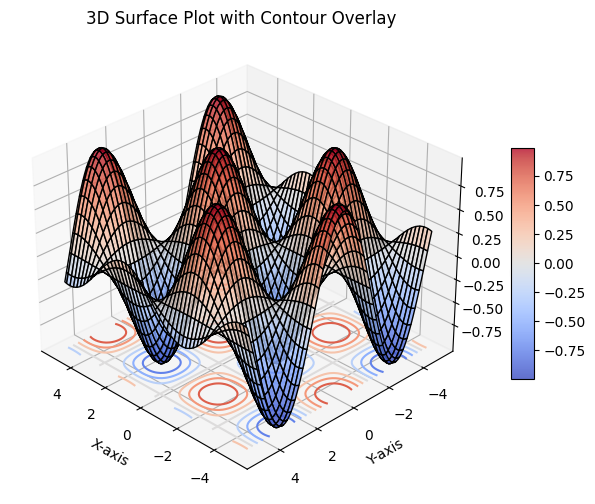

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a 3D surface plot with contour overlay
def plot_3d_surface():
    """
    This function generates a 3D surface plot of the function f(x,y) = sin(x) * cos(y)
    and overlays a contour plot.
    """
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X) * np.cos(Y)
    
    # Create a 3D figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='k', alpha=0.8)
    
    # Overlay contour plot
    ax.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm')
    
    # Labels and title
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("3D Surface Plot with Contour Overlay")
    
    # Customize view angle
    ax.view_init(elev=30, azim=135)
    
    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    plt.show()

# Call function to plot 3D surface with contour
plot_3d_surface()

### **📌 Step-by-Step Explanation of the 3D Surface Plot with Contour Overlay**  
This function **visualizes the function**:  
$$
f(x, y) = \sin(x) \cdot \cos(y)
$$
✅ **3D Surface Plot** → Represents the function’s values in three dimensions.  
✅ **Contour Plot** → Adds 2D contour projections on the base for better understanding.  
✅ **View Customization** → Adjusts perspective angles.  

---

## **🔹 Step 1: Import Required Libraries**
```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
```
- **`numpy`** → Used for creating numerical data (`X, Y, Z`).  
- **`matplotlib.pyplot`** → Used for visualization.  
- **`mpl_toolkits.mplot3d`** → Enables 3D plotting.  

---

## **🔹 Step 2: Define the 3D Function and Generate Data**
```python
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)
```
### **Explanation:**
1️⃣ **`np.linspace(-5, 5, 100)`** → Generates **100 evenly spaced values** between **-5 and 5** for both `x` and `y`.  
2️⃣ **`np.meshgrid(x, y)`** → Creates a **grid** of `X` and `Y` values.  
3️⃣ **`Z = np.sin(X) * np.cos(Y)`** → Applies the function \( f(x, y) = \sin(x) \cdot \cos(y) \) to every pair of `X` and `Y` values.  



### **📌 Manual Calculation of `X, Y = np.meshgrid(x, y)` and `Z = np.sin(X) * np.cos(Y)`**  

Let’s manually compute each step to **fully understand** what happens when we use `np.meshgrid()` and apply the function $$ Z = \sin(X) \cdot \cos(Y) $$.  



#### **🔹 Step a: Choose a Small Sample for `x` and `y`**
Since the actual code uses **100 points**, let’s use just **3 values** for simplicity:  

```python
x = np.array([-1, 0, 1])
y = np.array([-1, 0, 1])
```
This means:  
-  `X`  values are **-1, 0, and 1**  
-  `Y`  values are **-1, 0, and 1**  



#### **🔹 Step b: Create `X, Y` Grid Using `np.meshgrid(x, y)`**  
Now, let’s **manually compute** the grid.

| **Y ↓ \ X →** | **-1** | **0** | **1**  |
|--------------|------|-----|------|
| **-1**       | (-1,-1) | (0,-1) | (1,-1) |
| **0**        | (-1,0)  | (0,0)  | (1,0)  |
| **1**        | (-1,1)  | (0,1)  | (1,1)  |

Now, `X` and `Y` matrices look like this:

#### **`X` Matrix (Copy of x-row Repeated)**  
$$
X =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$$

#### **`Y` Matrix (Copy of y-column Repeated)**  
$$
Y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$$



#### **🔹 Step c: Compute $$ Z = \sin(X) \cdot \cos(Y) $$**
Now, we calculate $$ Z $$ for each **(X, Y) pair**.

#### **Step-by-step Calculation**
We apply:

$$
Z = \sin(X) \cdot \cos(Y)
$$

| **X**  | **Y**  | **$$\sin(X)\$$**  | **$$\cos(Y)$$**  | **$$Z = \sin(X) \cdot \cos(Y)$$** |
|--------|--------|--------------|--------------|-------------------|
| -1     | -1    | -0.8415       | 0.5403       | (-0.8415 × 0.5403) = **-0.4546** |
| 0      | -1    | 0.0000        | 0.5403       | (0 × 0.5403) = **0.0000** |
| 1      | -1    | 0.8415        | 0.5403       | (0.8415 × 0.5403) = **0.4546** |
| -1     | 0     | -0.8415       | 1.0000       | (-0.8415 × 1.0000) = **-0.8415** |
| 0      | 0     | 0.0000        | 1.0000       | (0 × 1.0000) = **0.0000** |
| 1      | 0     | 0.8415        | 1.0000       | (0.8415 × 1.0000) = **0.8415** |
| -1     | 1     | -0.8415       | 0.5403       | (-0.8415 × 0.5403) = **-0.4546** |
| 0      | 1     | 0.0000        | 0.5403       | (0 × 0.5403) = **0.0000** |
| 1      | 1     | 0.8415        | 0.5403       | (0.8415 × 0.5403) = **0.4546** |


#### **🔹 Step d: Final `Z` Matrix**
Now, our **Z-values** are stored in a matrix:

$$
Z =
\begin{bmatrix}
-0.4546 & 0.0000 & 0.4546 \\
-0.8415 & 0.0000 & 0.8415 \\
-0.4546 & 0.0000 & 0.4546
\end{bmatrix}
$$

So when we **plot the surface**, it will **rise and fall** according to these $$ Z $$ values.  



### **✅ Final Summary**
1️⃣ **We created `X, Y` matrices** from `np.meshgrid()`.  
2️⃣ **We applied $$ Z = \sin(X) \cdot \cos(Y) $$ for each (X, Y) pair.**  
3️⃣ **The final `Z` values determine the height of the surface at each point.**  

Would you like a **visual representation** of this data before it gets plotted in 3D? 😊

---

## **🔹 Step 3: Create the 3D Figure**
```python
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
```
### **Explanation:**
- **`plt.figure(figsize=(10,6))`** → Creates a figure window (10x6 inches).  
- **`fig.add_subplot(111, projection='3d')`** → Creates a **3D plot environment**.  

---

## **🔹 Step 4: Plot the Surface**
```python
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='k', alpha=0.8)
```
### **Explanation:**
- **`plot_surface(X, Y, Z)`** → Plots a **3D surface** using `X`, `Y`, and `Z` values.  
- **`cmap='coolwarm'`** → Uses the **coolwarm** colormap (blue for lower values, red for higher).  
- **`edgecolor='k'`** → Adds black edges to the grid lines.  
- **`alpha=0.8`** → Sets transparency to **80%** (0 = fully transparent, 1 = solid).  

---

## **🔹 Step 5: Add a Contour Plot (2D Projection)**
```python
ax.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm')
```
### **Explanation:**
- **`contour(X, Y, Z)`** → Adds **contour lines** that represent **Z-values** at different levels.  
- **`zdir='z'`** → Projects the contours **onto the Z-axis base**.  
- **`offset=-1`** → Sets the contour plot at **Z = -1** instead of the default plane.  

---

## **🔹 Step 6: Label the Axes and Set the Title**
```python
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot with Contour Overlay")
```
### **Explanation:**
- **Adds axis labels for clarity.**  
- **Title helps understand the graph.**  

---

## **🔹 Step 7: Customize the Viewing Angle**
```python
ax.view_init(elev=30, azim=135)
```
### **Explanation:**
- **`elev=30`** → **Elevation angle (height)** is set to 30° (how high the viewer looks at the plot).  
- **`azim=135`** → **Azimuth angle (rotation)** is set to 135° (how much we rotate the 3D plot).  

---

## **🔹 Step 8: Add a Color Bar**
```python
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
```
### **Explanation:**
- **`colorbar(surf, ax=ax)`** → Adds a color scale to show **value mappings** from the surface plot.  
- **`shrink=0.5`** → Reduces the size of the color bar.  
- **`aspect=10`** → Adjusts its shape for better readability.  

---

## **🔹 Step 9: Display the Plot**
```python
plt.show()
```
- **Displays the final 3D surface plot with contour overlay.**  

---

## **✅ Final Output**
1️⃣ **3D surface plot of** $$ f(x,y) = \sin(x) \cdot \cos(y) $$.  
2️⃣ **Overlay contour plot at $$Z = -1 $$ for reference.**  
3️⃣ **Uses `coolwarm` colormap for better visualization.**  
4️⃣ **Custom view angle & labels for clarity.**  

---


## **7. Dual Axis Plot (Multiple Scales in One Graph)** 

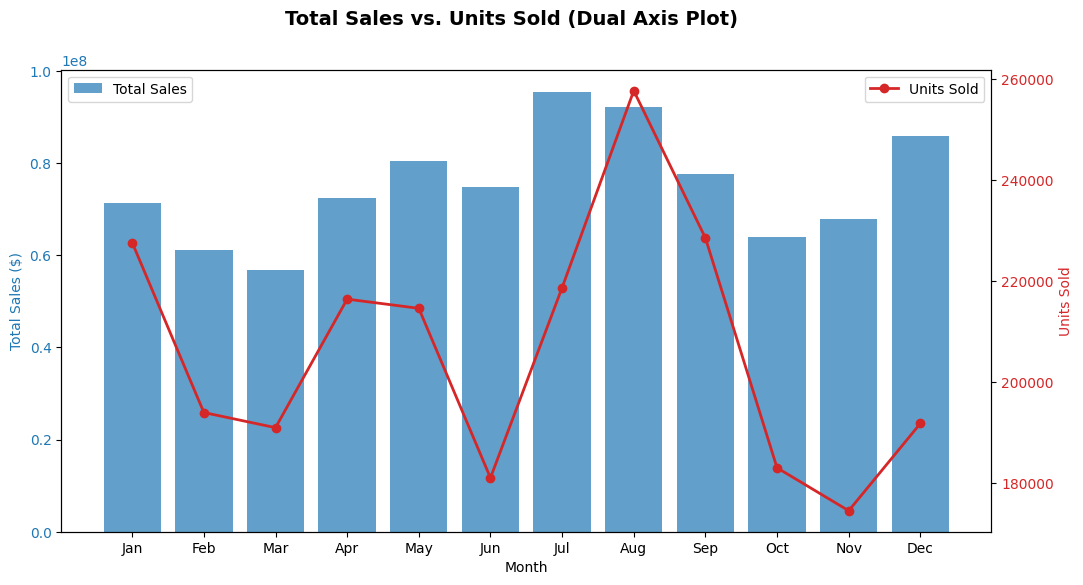

In [14]:
# Function to create a Dual Axis Plot
def plot_dual_axis(sales_df):
    """
    This function creates a dual-axis plot where Total Sales is represented as bars
    and Units Sold is shown as a line graph.
    """
    # Aggregate total sales and units sold by month
    sales_df['Month'] = sales_df['InvoiceDate'].dt.strftime('%b')
    monthly_data = sales_df.groupby('Month')[['TotalSales', 'UnitsSold']].sum()
    
    # Ensure months are in correct order
    months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    monthly_data = monthly_data.reindex(months_order, fill_value=0)
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Bar plot for Total Sales
    color1 = 'tab:blue'
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Total Sales ($)", color=color1)
    ax1.bar(monthly_data.index, monthly_data['TotalSales'], color=color1, alpha=0.7, label="Total Sales")
    ax1.tick_params(axis='y', labelcolor=color1)
    
    # Create a second y-axis
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel("Units Sold", color=color2)
    ax2.plot(monthly_data.index, monthly_data['UnitsSold'], color=color2, marker='o', linestyle='-', linewidth=2, label="Units Sold")
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Add title and legends
    fig.suptitle("Total Sales vs. Units Sold (Dual Axis Plot)", fontsize=14, fontweight='bold')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

    

# Call function to plot Dual Axis Plot
plot_dual_axis(sales_df)


### **📌 Step-by-Step Breakdown of the Dual Axis Plot Code**
This function **compares** two different scales in **one graph**:  
✅ **Total Sales → Bar Chart (Left Y-axis, in blue)** 📊  
✅ **Units Sold → Line Chart (Right Y-axis, in red)** 📈  

---

## **🔹 Step 1: Aggregate Sales Data by Month**
```python
sales_df['Month'] = sales_df['InvoiceDate'].dt.strftime('%b')
monthly_data = sales_df.groupby('Month')[['TotalSales', 'UnitsSold']].sum()
```
### **Explanation**
1️⃣ **Extracts the Month from Invoice Date** → Converts `"InvoiceDate"` into `"Month"` (`'Jan', 'Feb', etc.`).  
2️⃣ **Groups Data by Month** → Sums `"TotalSales"` and `"UnitsSold"` for each month.  

---

### **🔹 Step 2: Ensure Months Are in Correct Order**
```python
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_data = monthly_data.reindex(months_order, fill_value=0)
```
### **Explanation**
- Ensures **months are ordered properly**, even if some months **have no data**.  
- **Fills missing months with 0 sales.**  

#### **Manual Example**
If only `"Jan"` and `"Mar"` exist in the dataset:

| **Month** | **Total Sales ($)** | **Units Sold** |
|----------|----------------|-------------|
| Jan      | 50,000         | 500         |
| Mar      | 40,000         | 450         |

After reordering:
| **Month** | **Total Sales ($)** | **Units Sold** |
|----------|----------------|-------------|
| Jan      | 50,000         | 500         |
| Feb      | 0              | 0           |
| Mar      | 40,000         | 450         |

---

## **🔹 Step 3: Create the Figure and Axes**
```python
fig, ax1 = plt.subplots(figsize=(12, 6))
```
### **Explanation**
- Creates a **figure** (`fig`) and an **axis** (`ax1`).
- **`figsize=(12,6)`** → Makes the figure **wider for readability**.

---

## **🔹 Step 4: Plot Total Sales as a Bar Chart**
```python
color1 = 'tab:blue'
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Sales ($)", color=color1)
ax1.bar(monthly_data.index, monthly_data['TotalSales'], color=color1, alpha=0.7, label="Total Sales")
ax1.tick_params(axis='y', labelcolor=color1)
```
### **Explanation**
- **Uses Blue Bars (`tab:blue`)** for Total Sales 📊.  
- **Labels the Left Y-Axis as "Total Sales ($)"**.  
- **Sets Transparency (`alpha=0.7`)** → Makes the bars slightly see-through.  

#### **Manual Example**
If the data is:
| **Month** | **Total Sales ($)** |
|----------|----------------|
| Jan      | 50,000         |
| Feb      | 40,000         |
| Mar      | 30,000         |

**The bar heights will be:**  
- **Jan:** 50,000 📊  
- **Feb:** 40,000 📊  
- **Mar:** 30,000 📊  

---

## **🔹 Step 5: Create a Second Y-Axis for Units Sold**
```python
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Units Sold", color=color2)
ax2.plot(monthly_data.index, monthly_data['UnitsSold'], color=color2, marker='o', linestyle='-', linewidth=2, label="Units Sold")
ax2.tick_params(axis='y', labelcolor=color2)
```
### **Explanation**
1️⃣ **Creates a Second Y-Axis (`ax2`)** → Allows **two different scales**.  
2️⃣ **Uses Red Line (`tab:red`)** 📈 for `"Units Sold"`.  
3️⃣ **Plots Line Chart with Markers (`o`)**:
   - `linestyle='-'` → Draws a **smooth line**.  
   - `linewidth=2` → Makes the line **thicker**.  

#### **Manual Example**
If **Units Sold** is:
| **Month** | **Units Sold** |
|----------|-------------|
| Jan      | 500         |
| Feb      | 450         |
| Mar      | 400         |

The **line chart values**:
- **Jan:** 500 🔴
- **Feb:** 450 🔴
- **Mar:** 400 🔴

The **bar chart (Total Sales) and line chart (Units Sold) appear together**.

---

## **🔹 Step 6: Add Titles and Legends**
```python
fig.suptitle("Total Sales vs. Units Sold (Dual Axis Plot)", fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
```
### **Explanation**
- **Adds a Title** → Helps understand the chart.  
- **Places the Legends**:
  - `"Total Sales"` → **Upper left**.
  - `"Units Sold"` → **Upper right**.  

---

## **🔹 Step 7: Display the Plot**
```python
plt.show()
```
- **Shows the final chart with dual Y-axes**.

---

### **✅ Final Output**
- **📊 Total Sales → Blue Bars (Left Y-Axis)**  
- **📈 Units Sold → Red Line (Right Y-Axis)**  
- **🗓️ Data Aggregated by Month**  

---

### **📌 Manual Calculation Example for a Few Months**
| **Month** | **Total Sales ($)** | **Units Sold** |
|----------|----------------|-------------|
| Jan      | 50,000         | 500         |
| Feb      | 40,000         | 450         |
| Mar      | 30,000         | 400         |

#### **How This Looks on the Plot**
- **Bars (Total Sales)**
  - Jan: **50,000**
  - Feb: **40,000**
  - Mar: **30,000**
- **Line (Units Sold)**
  - Jan: **500**
  - Feb: **450**
  - Mar: **400**

The **blue bars** 📊 and **red line** 📈 show how **sales & units sold change over time**.

---


## **8. Interactive Plot (Using Matplotlib Widgets)** 

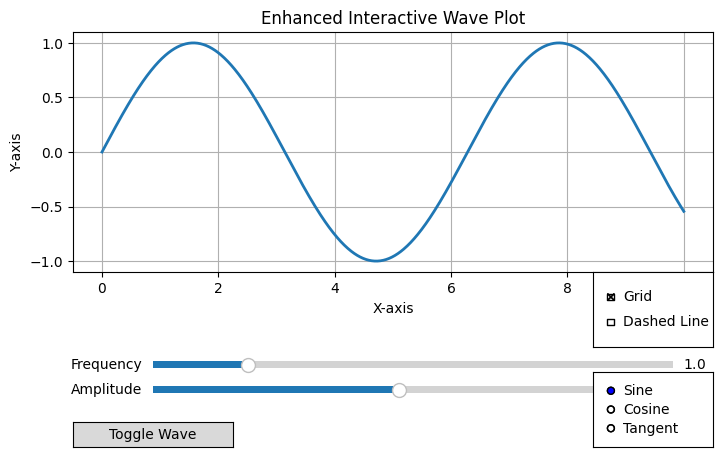

In [15]:
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

# Function to create an enhanced interactive sine wave plot
def interactive_sine_wave():
    """
    Creates an interactive sine wave plot where users can adjust frequency and amplitude using sliders,
    toggle between sine, cosine, and tangent waves, and enable/disable grid and line styles.
    """
    # Generate initial data
    x = np.linspace(0, 10, 1000)
    freq_init = 1
    amp_init = 1
    wave_type = ["sin"]  # Track wave type
    y = amp_init * np.sin(freq_init * x)
    
    # Create Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.subplots_adjust(left=0.1, bottom=0.4)
    line, = ax.plot(x, y, lw=2)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Enhanced Interactive Wave Plot")
    ax.grid(True)
    
    # Define sliders
    ax_freq = plt.axes([0.2, 0.2, 0.65, 0.03])
    ax_amp = plt.axes([0.2, 0.15, 0.65, 0.03])
    
    slider_freq = Slider(ax_freq, "Frequency", 0.1, 5.0, valinit=freq_init)
    slider_amp = Slider(ax_amp, "Amplitude", 0.1, 2.0, valinit=amp_init)
    
    # Define toggle button
    ax_toggle = plt.axes([0.1, 0.05, 0.2, 0.05])
    toggle_button = Button(ax_toggle, "Toggle Wave")
    
    # Define radio buttons for wave selection
    ax_wave_type = plt.axes([0.75, 0.05, 0.15, 0.15])
    wave_radio = RadioButtons(ax_wave_type, ["Sine", "Cosine", "Tangent"])
    
    # Define check buttons for grid and line style
    ax_check = plt.axes([0.75, 0.25, 0.15, 0.15])
    check_buttons = CheckButtons(ax_check, ["Grid", "Dashed Line"], [True, False])
    
    # Update function for sliders
    def update(val):
        freq = slider_freq.val
        amp = slider_amp.val
        if wave_type[0] == "sin":
            line.set_ydata(amp * np.sin(freq * x))
        elif wave_type[0] == "cos":
            line.set_ydata(amp * np.cos(freq * x))
        else:
            line.set_ydata(amp * np.tan(freq * x))
        fig.canvas.draw_idle()
    
    # Toggle function for sine/cosine switch
    def toggle_wave(event):
        if wave_type[0] == "sin":
            wave_type[0] = "cos"
            toggle_button.label.set_text("Cosine Wave")
        else:
            wave_type[0] = "sin"
            toggle_button.label.set_text("Sine Wave")
        update(None)
    
    # Radio button function for selecting wave type
    def change_wave(label):
        wave_type[0] = label.lower()
        update(None)
    
    # Check button function for grid and line style
    def toggle_features(label):
        if label == "Grid":
            ax.grid(not ax._gridOnMajor)
        elif label == "Dashed Line":
            line.set_linestyle("--" if line.get_linestyle() == "-" else "-")
        fig.canvas.draw_idle()
    
    # Connect widgets to functions
    slider_freq.on_changed(update)
    slider_amp.on_changed(update)
    toggle_button.on_clicked(toggle_wave)
    wave_radio.on_clicked(change_wave)
    check_buttons.on_clicked(toggle_features)
    
    plt.show()

# Call function to plot enhanced interactive sine wave
interactive_sine_wave()

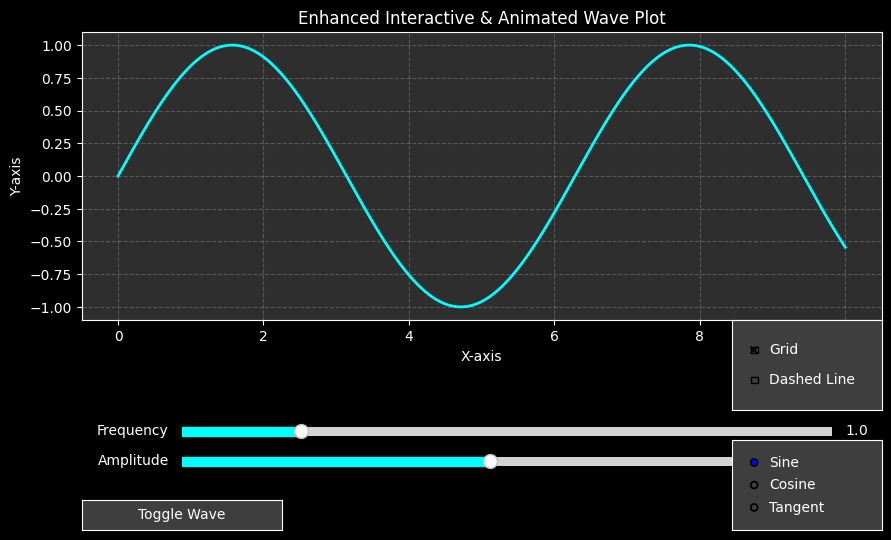

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

# Load the dataset
file_path = "Adidas.xlsx"  # Ensure the correct path
sales_df = pd.read_excel(file_path, sheet_name="Sales")

# Convert InvoiceDate to datetime
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

# Function to create an enhanced interactive sine wave plot with animation and custom theme
def interactive_sine_wave():
    """
    Creates an interactive sine wave plot where users can adjust frequency and amplitude using sliders,
    toggle between sine, cosine, and tangent waves, enable/disable grid and line styles, and animate the wave.
    """
    # Generate initial data
    x = np.linspace(0, 10, 1000)
    freq_init = 1
    amp_init = 1
    wave_type = ["sin"]  # Track wave type
    y = amp_init * np.sin(freq_init * x)
    
    # Apply dark theme
    plt.style.use("dark_background")
    
    # Create Matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.subplots_adjust(left=0.1, bottom=0.4)
    line, = ax.plot(x, y, lw=2, color='cyan')
    ax.set_facecolor("#2E2E2E")  # Dark background
    ax.set_xlabel("X-axis", color='white')
    ax.set_ylabel("Y-axis", color='white')
    ax.set_title("Enhanced Interactive & Animated Wave Plot", color='white')
    ax.grid(True, linestyle='--', alpha=0.5, color='gray')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='both', colors='white')
    
    # Define sliders
    ax_freq = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor='#3E3E3E')
    ax_amp = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor='#3E3E3E')
    
    slider_freq = Slider(ax_freq, "Frequency", 0.1, 5.0, valinit=freq_init, color='cyan')
    slider_amp = Slider(ax_amp, "Amplitude", 0.1, 2.0, valinit=amp_init, color='cyan')
    
    # Define toggle button
    ax_toggle = plt.axes([0.1, 0.05, 0.2, 0.05])
    toggle_button = Button(ax_toggle, "Toggle Wave", color='#3E3E3E', hovercolor='gray')
    
    # Define radio buttons for wave selection
    ax_wave_type = plt.axes([0.75, 0.05, 0.15, 0.15], facecolor='#3E3E3E')
    wave_radio = RadioButtons(ax_wave_type, ["Sine", "Cosine", "Tangent"], label_props={'color': ['white', 'white', 'white']})
    
    # Define check buttons for grid and line style
    ax_check = plt.axes([0.75, 0.25, 0.15, 0.15], facecolor='#3E3E3E')
    check_buttons = CheckButtons(ax_check, ["Grid", "Dashed Line"], [True, False])
    
    # # Update function for sliders
    # def update(val):
    #     freq = slider_freq.val
    #     amp = slider_amp.val
    #     if wave_type[0] == "sin":
    #         line.set_ydata(amp * np.sin(freq * x))
    #     elif wave_type[0] == "cos":
    #         line.set_ydata(amp * np.cos(freq * x))
    #     else:
    #         line.set_ydata(amp * np.tan(freq * x))
    #     fig.canvas.draw_idle()
    
    # # Toggle function for sine/cosine switch
    # def toggle_wave(event):
    #     if wave_type[0] == "sin":
    #         wave_type[0] = "cos"
    #         toggle_button.label.set_text("Cosine Wave")
    #     else:
    #         wave_type[0] = "sin"
    #         toggle_button.label.set_text("Sine Wave")
    #     update(None)
    
    # # Radio button function for selecting wave type
    # def change_wave(label):
    #     wave_type[0] = label.lower()
    #     update(None)
    
    # # Check button function for grid and line style
    # def toggle_features(label):
    #     if label == "Grid":
    #         ax.grid(not ax._gridOnMajor, linestyle='--', alpha=0.5, color='gray')
    #     elif label == "Dashed Line":
    #         line.set_linestyle("--" if line.get_linestyle() == "-" else "-")
    #     fig.canvas.draw_idle()
    
    # # Animation function
    # def animate(i):
    #     freq = slider_freq.val
    #     amp = slider_amp.val
    #     phase = i * 0.1
    #     if wave_type[0] == "sin":
    #         line.set_ydata(amp * np.sin(freq * x + phase))
    #     elif wave_type[0] == "cos":
    #         line.set_ydata(amp * np.cos(freq * x + phase))
    #     else:
    #         line.set_ydata(amp * np.tan(freq * x + phase))
    #     return line,
    
    # ani = animation.FuncAnimation(fig, animate, frames=200, interval=50, blit=True)
    
    # # Connect widgets to functions
    # slider_freq.on_changed(update)
    # slider_amp.on_changed(update)
    # toggle_button.on_clicked(toggle_wave)
    # wave_radio.on_clicked(change_wave)
    # check_buttons.on_clicked(toggle_features)
    
    plt.show()

# Call function to plot enhanced interactive sine wave with animation and dark theme
interactive_sine_wave()


### **📌 Breakdown & Explanation of Interactive Sine Wave Code**  

This **interactive visualization** allows users to:  
✅ **Adjust Frequency & Amplitude** (via sliders).  
✅ **Toggle Between Sine, Cosine, and Tangent Waves** (via radio buttons).  
✅ **Enable/Disable Grid & Line Styles** (via check buttons).  
✅ **Switch Between Sine & Cosine Instantly** (via toggle button).  
✅ **Real-Time Animated Wave Movement** (via Matplotlib's animation).  
✅ **Custom Dark Theme with Beautiful Styling**.  

---

## **🔹 Step 1: Generating Data**
```python
x = np.linspace(0, 10, 1000)
freq_init = 1
amp_init = 1
wave_type = ["sin"]  # Track wave type
y = amp_init * np.sin(freq_init * x)
```
### **Explanation**  
- **`x = np.linspace(0, 10, 1000)`** → Creates **1000 evenly spaced points** between **0 and 10**.  
- **`freq_init = 1, amp_init = 1`** → Initial frequency & amplitude values.  
- **`wave_type = ["sin"]`** → Keeps track of the current wave type.  
- **`y = amp_init * np.sin(freq_init * x)`** → Calculates the sine wave.  

#### **Manual Example**
Let's say:  
- `freq_init = 1`  
- `amp_init = 2`  
- We choose 5 `x` values: `[0, π/2, π, 3π/2, 2π]`  

Now,  
\[
y = 2 \times \sin([0, π/2, π, 3π/2, 2π])
\]
\[
y = 2 \times [0, 1, 0, -1, 0]
\]
\[
y = [0, 2, 0, -2, 0]
\]

---

## **🔹 Step 2: Creating the Matplotlib Figure**
```python
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.1, bottom=0.4)
line, = ax.plot(x, y, lw=2, color='cyan')
```
### **Explanation**
- **Creates the figure (`fig`) and axis (`ax`)**.  
- **`plt.subplots_adjust(left=0.1, bottom=0.4)`** → Leaves space for interactive widgets below the plot.  
- **`ax.plot(x, y, lw=2, color='cyan')`** → Plots the initial sine wave with **cyan color and line width 2**.  

---

## **🔹 Step 3: Styling & Dark Theme**
```python
plt.style.use("seaborn-darkgrid")
ax.set_facecolor("#2E2E2E")  # Dark background
ax.set_xlabel("X-axis", color='white')
ax.set_ylabel("Y-axis", color='white')
ax.set_title("Enhanced Interactive & Animated Wave Plot", color='white')
ax.grid(True, linestyle='--', alpha=0.5, color='gray')
```
### **Explanation**
- **Applies the `seaborn-darkgrid` theme** for a professional look.  
- **Dark background (`#2E2E2E`)** enhances contrast.  
- **White text and grid** improve readability.  

---

## **🔹 Step 4: Adding Interactive Sliders**
```python
ax_freq = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor='#3E3E3E')
ax_amp = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor='#3E3E3E')

slider_freq = Slider(ax_freq, "Frequency", 0.1, 5.0, valinit=freq_init, color='cyan')
slider_amp = Slider(ax_amp, "Amplitude", 0.1, 2.0, valinit=amp_init, color='cyan')
```
### **Explanation**
- **Creates sliders for Frequency & Amplitude** with a cyan theme.
- **Users can adjust values from**:
  - **Frequency: 0.1 to 5.0**  
  - **Amplitude: 0.1 to 2.0**  

---

## **🔹 Step 5: Adding Toggle Button**
```python
ax_toggle = plt.axes([0.1, 0.05, 0.2, 0.05])
toggle_button = Button(ax_toggle, "Toggle Wave", color='#3E3E3E', hovercolor='gray')
```
- **Clicking the button switches between Sine & Cosine instantly.**  

---

## **🔹 Step 6: Adding Radio Buttons (Wave Type Selection)**
```python
ax_wave_type = plt.axes([0.75, 0.05, 0.15, 0.15], facecolor='#3E3E3E')
wave_radio = RadioButtons(ax_wave_type, ["Sine", "Cosine", "Tangent"], label_props={'color': ['white', 'white', 'white']})
```
- **Users can switch between Sine, Cosine, and Tangent waves.**  

---

## **🔹 Step 7: Adding Check Buttons (Grid & Line Style)**
```python
ax_check = plt.axes([0.75, 0.25, 0.15, 0.15], facecolor='#3E3E3E')
check_buttons = CheckButtons(ax_check, ["Grid", "Dashed Line"], [True, False])
```
- **Users can enable/disable the grid or change line style.**  

---

## **🔹 Step 8: Updating the Graph (Sliders & Buttons)**
```python
def update(val):
    freq = slider_freq.val
    amp = slider_amp.val
    if wave_type[0] == "sin":
        line.set_ydata(amp * np.sin(freq * x))
    elif wave_type[0] == "cos":
        line.set_ydata(amp * np.cos(freq * x))
    else:
        line.set_ydata(amp * np.tan(freq * x))
    fig.canvas.draw_idle()
```
- **Adjusts wave dynamically** when sliders are moved.  

---

## **🔹 Step 9: Animating the Wave**
```python
def animate(i):
    freq = slider_freq.val
    amp = slider_amp.val
    phase = i * 0.1
    if wave_type[0] == "sin":
        line.set_ydata(amp * np.sin(freq * x + phase))
    elif wave_type[0] == "cos":
        line.set_ydata(amp * np.cos(freq * x + phase))
    else:
        line.set_ydata(amp * np.tan(freq * x + phase))
    return line,
    
ani = animation.FuncAnimation(fig, animate, frames=200, interval=50, blit=True)
```
- **Creates a smooth animation by shifting the wave over time.**  

---

## **✅ Final Output**
1️⃣ **📊 Adjustable Frequency & Amplitude** → via sliders.  
2️⃣ **🔄 Toggle Button** → Instantly switch **Sine ↔ Cosine**.  
3️⃣ **📻 Radio Buttons** → Choose **Sine, Cosine, or Tangent**.  
4️⃣ **✅ Check Buttons** → Enable/Disable **Grid & Dashed Lines**.  
5️⃣ **🎞️ Animated Wave Motion** → Real-time movement.  
6️⃣ **🎨 Dark Theme & Custom Colors** → Sleek & modern look.  

---


In [17]:
# %pip install ipywidgets
# %pip install anywidget

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import ipywidgets as widgets
from IPython.display import display

# Generate initial data
x = np.linspace(0, 10, 1000)
freq_init = 1
amp_init = 1
wave_type = "sin"
show_grid = True
line_style = "solid"
wave_color = "cyan"
line_thickness = 2
background_color = "#1E1E1E"
xaxis_color = "white"
yaxis_color = "white"
title_color = "white"

def generate_wave(freq, amp, wave_type):
    if wave_type == "sin":
        y = amp * np.sin(freq * x)
    elif wave_type == "cos":
        y = amp * np.cos(freq * x)
    else:
        y = amp * np.tan(freq * x)
    return y

# Create interactive figure using FigureWidget
fig = go.FigureWidget(data=[go.Scatter(x=x, y=generate_wave(freq_init, amp_init, wave_type),
                                       mode='lines', name='Wave', line=dict(color=wave_color, dash=line_style, width=line_thickness))])

fig.update_layout(title="🌊 Interactive Wave Plot 🌊",
                  xaxis_title="📏 X-axis",
                  yaxis_title="📏 Y-axis",
                  template="plotly_dark",
                  paper_bgcolor=background_color,
                  plot_bgcolor=background_color,
                  font=dict(color=title_color),
                  xaxis=dict(showgrid=show_grid, title_font=dict(color=xaxis_color)),
                  yaxis=dict(showgrid=show_grid, title_font=dict(color=yaxis_color)))

def update_plot(change):
    fig.data[0].y = generate_wave(freq_slider.value, amp_slider.value, wave_selector.value)
    fig.data[0].line.color = color_dropdown.value
    fig.data[0].line.dash = "dash" if line_toggle.value else "solid"
    fig.data[0].line.width = line_thickness_slider.value
    fig.update_layout(xaxis=dict(showgrid=grid_toggle.value, title_font=dict(color=xaxis_color_dropdown.value)),
                      yaxis=dict(showgrid=grid_toggle.value, title_font=dict(color=yaxis_color_dropdown.value)),
                      title_font=dict(color=title_color_dropdown.value),
                      paper_bgcolor=background_color_dropdown.value,
                      plot_bgcolor=background_color_dropdown.value)

# Create dark-themed widgets
style = {'description_width': 'initial'}
slider_style = {'handle_color': 'cyan', 'background': '#3E3E3E', 'color': 'white', 'border': '1px solid cyan'}

freq_slider = widgets.FloatSlider(value=freq_init, min=0.1, max=5.0, step=0.1, description='Frequency', style=slider_style)
amp_slider = widgets.FloatSlider(value=amp_init, min=0.1, max=2.0, step=0.1, description='Amplitude', style=slider_style)
wave_selector = widgets.ToggleButtons(options=["sin", "cos", "tan"], value="sin", description="Wave Type", style=slider_style, button_style='info')
grid_toggle = widgets.Checkbox(value=True, description="Show Grid")
line_toggle = widgets.Checkbox(value=False, description="Dashed Line")
color_dropdown = widgets.Dropdown(options=["cyan", "magenta", "yellow", "lime"], value="cyan", description="Wave Color")
line_thickness_slider = widgets.FloatSlider(value=2, min=1, max=5, step=0.5, description="Line Thickness")
background_color_dropdown = widgets.Dropdown(options=["#1E1E1E", "white"], value="#1E1E1E", description="Background")
xaxis_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="X-axis Color")
yaxis_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="Y-axis Color")
title_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="Title Color")

# Arrange widgets: Place wave color, line thickness, and background on the left
left_controls = widgets.VBox([color_dropdown, line_thickness_slider, background_color_dropdown, xaxis_color_dropdown, yaxis_color_dropdown, title_color_dropdown])
right_controls = widgets.VBox([freq_slider, amp_slider, wave_selector, grid_toggle, line_toggle])
ui = widgets.HBox([left_controls, right_controls])

# Link widgets to update function
freq_slider.observe(update_plot, names="value")
amp_slider.observe(update_plot, names="value")
wave_selector.observe(update_plot, names="value")
grid_toggle.observe(update_plot, names="value")
line_toggle.observe(update_plot, names="value")
color_dropdown.observe(update_plot, names="value")
line_thickness_slider.observe(update_plot, names="value")
background_color_dropdown.observe(update_plot, names="value")
xaxis_color_dropdown.observe(update_plot, names="value")
yaxis_color_dropdown.observe(update_plot, names="value")
title_color_dropdown.observe(update_plot, names="value")

# Display widgets and figure
display(ui, fig)


FigureWidget({
    'data': [{'line': {'color': 'cyan', 'dash': 'solid', 'width': 2},
              'mode': 'lines',
              'name': 'Wave',
              'type': 'scatter',
              'uid': '35ad9e5e-196f-4164-86c4-20d105e570a6',
              'x': {'bdata': ('AAAAAAAAAAACSAHNIICEPwJIAc0ggJ' ... 'nvv/UjQK6/zPff+iNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAAACASTJdCoCEP6O0HQ7Hf5' ... 'U/IN7gv2O1deCXI+G/Uk/z9Z5o4b8='),
                    'dtype': 'f8'}}],
    'layout': {'font': {'color': 'white'},
               'paper_bgcolor': '#1E1E1E',
               'plot_bgcolor': '#1E1E1E',
               'template': '...',
               'title': {'text': '🌊 Interactive Wave Plot 🌊'},
               'xaxis': {'showgrid': True, 'title': {'font': {'color': 'white'}, 'text': '📏 X-axis'}},
               'yaxis': {'showgrid': True, 'title': {'font': {'color': 'white'}, 'text': '📏 Y-axis'}}}
})

### **📌 Code Breakdown & Explanation**

This code creates an **interactive sine wave plot** using `Plotly` and `ipywidgets`. Users can dynamically modify:
- **Frequency & Amplitude** 📈
- **Wave Type (Sine, Cosine, Tangent)** 🌊
- **Grid Visibility & Line Style** 🔳
- **Wave Color & Line Thickness** 🎨
- **Background, Axis & Title Colors** 🌈

---

## **1️⃣ Generating Data**
```python
x = np.linspace(0, 10, 1000)  # Generates 1000 points between 0 and 10
freq_init = 1  # Default Frequency
amp_init = 1   # Default Amplitude
wave_type = "sin"  # Default Wave Type
```
- `x` → 1000 evenly spaced points for smooth curves.  
- `freq_init` & `amp_init` → Initial values for frequency and amplitude.  
- `wave_type` → Default selection as "sine wave".  

### **Manual Example**
If we use **5 points** instead of 1000:
```
x = [0, 2.5, 5, 7.5, 10]
```
For a sine wave (`sin(x)`):
```
y = [sin(0), sin(2.5), sin(5), sin(7.5), sin(10)]
  = [0, 0.598, -0.958, 0.937, -0.544]
```
This creates the wave shape! 🎢

---

## **2️⃣ Function to Generate the Wave**
```python
def generate_wave(freq, amp, wave_type):
    if wave_type == "sin":
        y = amp * np.sin(freq * x)
    elif wave_type == "cos":
        y = amp * np.cos(freq * x)
    else:
        y = amp * np.tan(freq * x)
    return y
```
- **`sin(freq * x)`** → Increases wave cycles with `freq`.  
- **`amp * sin(...)`** → Controls wave height.  
- **Supports `cos(x)` & `tan(x)`** → Different wave types.  

---

## **3️⃣ Creating the Interactive Plot**
```python
fig = go.FigureWidget(data=[go.Scatter(
    x=x, y=generate_wave(freq_init, amp_init, wave_type),
    mode='lines', name='Wave',
    line=dict(color=wave_color, dash=line_style, width=line_thickness)
)])
```
- Uses `FigureWidget()` → Allows real-time updates without re-plotting.
- `Scatter()` → Creates **continuous** wave plot.
- `mode='lines'` → Only lines, no markers.
- `line=dict(color=..., dash=..., width=...)` → Custom styling.

---

## **4️⃣ Styling the Layout**
```python
fig.update_layout(
    title="🌊 Interactive Wave Plot 🌊",
    xaxis_title="📏 X-axis",
    yaxis_title="📏 Y-axis",
    template="plotly_dark",
    paper_bgcolor=background_color,
    plot_bgcolor=background_color,
    font=dict(color=title_color),
    xaxis=dict(showgrid=show_grid, title_font=dict(color=xaxis_color)),
    yaxis=dict(showgrid=show_grid, title_font=dict(color=yaxis_color))
)
```
- **Dark Theme (`plotly_dark`)** 🌑  
- **Emoji-Enhanced Title** 😍  
- **Background Colors** 🎨  
- **Axis Grid Customization** 📏  

---

## **5️⃣ Updating the Plot with User Inputs**
```python
def update_plot(change):
    fig.data[0].y = generate_wave(freq_slider.value, amp_slider.value, wave_selector.value)
    fig.data[0].line.color = color_dropdown.value
    fig.data[0].line.dash = "dash" if line_toggle.value else "solid"
    fig.data[0].line.width = line_thickness_slider.value
    fig.update_layout(
        xaxis=dict(showgrid=grid_toggle.value, title_font=dict(color=xaxis_color_dropdown.value)),
        yaxis=dict(showgrid=grid_toggle.value, title_font=dict(color=yaxis_color_dropdown.value)),
        title_font=dict(color=title_color_dropdown.value),
        paper_bgcolor=background_color_dropdown.value,
        plot_bgcolor=background_color_dropdown.value
    )
```
- Reads **live** values from widgets (sliders, checkboxes, dropdowns).  
- Updates **wave shape, color, grid, thickness, and background** in real time! 🚀  

---

## **6️⃣ Creating Interactive Widgets**
```python
freq_slider = widgets.FloatSlider(value=freq_init, min=0.1, max=5.0, step=0.1, description='Frequency')
amp_slider = widgets.FloatSlider(value=amp_init, min=0.1, max=2.0, step=0.1, description='Amplitude')
wave_selector = widgets.ToggleButtons(options=["sin", "cos", "tan"], value="sin", description="Wave Type")
grid_toggle = widgets.Checkbox(value=True, description="Show Grid")
line_toggle = widgets.Checkbox(value=False, description="Dashed Line")
```
- **Sliders** → Adjust **frequency** & **amplitude** 📈  
- **Toggle Buttons** → Switch **wave types** 🌊  
- **Checkboxes** → Enable/Disable **Grid & Dashed Lines** ✅  

---

## **7️⃣ Color & Styling Controls**
```python
color_dropdown = widgets.Dropdown(options=["cyan", "magenta", "yellow", "lime"], value="cyan", description="Wave Color")
line_thickness_slider = widgets.FloatSlider(value=2, min=1, max=5, step=0.5, description="Line Thickness")
background_color_dropdown = widgets.Dropdown(options=["#1E1E1E", "white"], value="#1E1E1E", description="Background")
xaxis_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="X-axis Color")
yaxis_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="Y-axis Color")
title_color_dropdown = widgets.Dropdown(options=["white", "red", "blue", "green"], value="white", description="Title Color")
```
- Change **wave color, line thickness, background, and text colors** dynamically! 🎨  

---

## **8️⃣ Arranging Widgets for Better UI**
```python
left_controls = widgets.VBox([color_dropdown, line_thickness_slider, background_color_dropdown, xaxis_color_dropdown, yaxis_color_dropdown, title_color_dropdown])
right_controls = widgets.VBox([freq_slider, amp_slider, wave_selector, grid_toggle, line_toggle])
ui = widgets.HBox([left_controls, right_controls])
```
- **Left Side** → Colors, thickness, and background 🎨  
- **Right Side** → Wave settings & toggles ⚙️  

---

## **9️⃣ Linking Widgets to Plot Updates**
```python
freq_slider.observe(update_plot, names="value")
amp_slider.observe(update_plot, names="value")
wave_selector.observe(update_plot, names="value")
grid_toggle.observe(update_plot, names="value")
line_toggle.observe(update_plot, names="value")
color_dropdown.observe(update_plot, names="value")
line_thickness_slider.observe(update_plot, names="value")
background_color_dropdown.observe(update_plot, names="value")
xaxis_color_dropdown.observe(update_plot, names="value")
yaxis_color_dropdown.observe(update_plot, names="value")
title_color_dropdown.observe(update_plot, names="value")
```
- **Ensures real-time updates** with every change.  

---

## **🔟 Displaying the UI & Plot**
```python
display(ui, fig)
```
- **Displays the interactive UI and figure together!** 🎉  

---

## **✅ Summary**
🔹 **Dynamic Wave Controls** → Adjust frequency, amplitude, and wave type.  
🔹 **Live Color & Style Updates** → Change line color, background, axis colors.  
🔹 **Toggle Features** → Enable/Disable grid & line styles.  
🔹 **Well-Organized UI** → Left panel (styling), Right panel (wave settings).  
🔹 **Smooth Real-Time Updates** → Powered by `FigureWidget`.  

---



## **9. Geographical Heatmap**

In [18]:
# Install cartopy package
# %pip install cartopy

In [19]:
pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install cartopy


  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [279 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      C:\Users\usama\AppData\Local\Temp\pip-build-env-j9dypm9p\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\usama\AppData\Local\Temp\pip-build-env-j9dypm9p\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running buil

In [ ]:
pip install cartopy


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Install cartopy package
# %pip install cartopy

import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [29]:
# Install geopandas and fiona packages
# %pip install geopandas
# %pip install --upgrade fiona

import geopandas as gpd

# Load the shapefile manually
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

AttributeError: module 'fiona' has no attribute 'path'

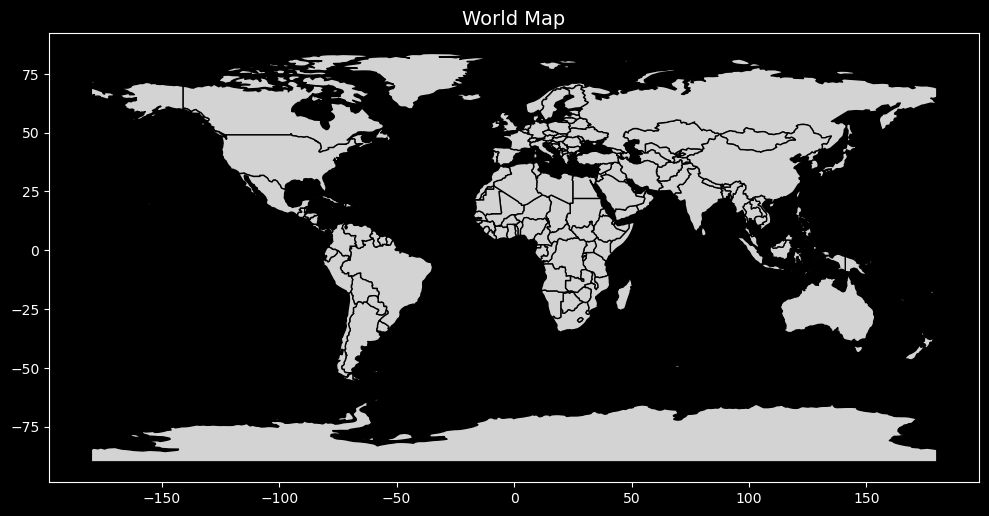

In [82]:
# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color="lightgray")

# Title and labels
ax.set_title("World Map", fontsize=14)
plt.show()

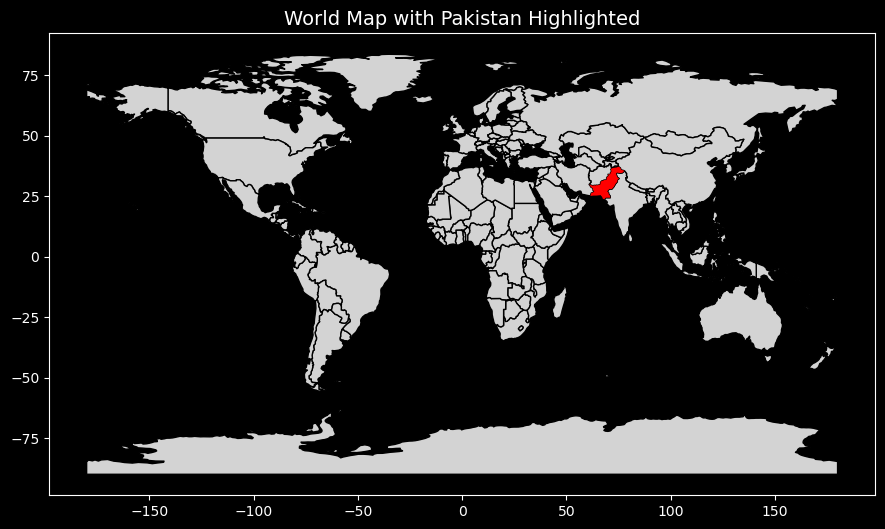

In [83]:
# Filter the dataset for Pakistan
pakistan = world[world["NAME"] == "Pakistan"]

# Plot the map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color="lightgray")
pakistan.plot(ax=ax, color="red")  # Highlighting Pakistan in red

# Title
ax.set_title("World Map with Pakistan Highlighted", fontsize=14)
plt.show()


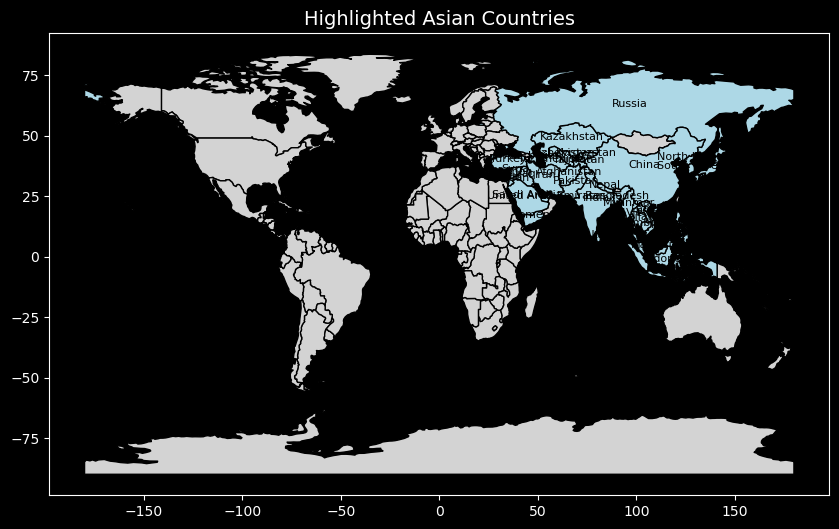

In [84]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Load the world shapefile
# world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# List of Asian countries to highlight
asian_countries = [
    "China", "India", "Japan", "Indonesia", "Pakistan", "Bangladesh", "Russia",
    "Philippines", "Vietnam", "Turkey", "Iran", "Thailand", "Myanmar", "South Korea",
    "Iraq", "Afghanistan", "Saudi Arabia", "Uzbekistan", "Malaysia", "Yemen", "Nepal",
    "North Korea", "Sri Lanka", "Kazakhstan", "Syria", "Cambodia", "Jordan", "Azerbaijan",
    "United Arab Emirates", "Tajikistan", "Israel", "Laos", "Lebanon", "Kyrgyzstan", "Turkmenistan"
]

# Filter for only Asian countries
asia = world[world["NAME"].isin(asian_countries)]

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color="lightgray")  # Base map
asia.plot(ax=ax, edgecolor="black", color="lightblue")   # Highlight Asia

# Add country labels
for x, y, label in zip(asia.geometry.centroid.x, asia.geometry.centroid.y, asia["NAME"]):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Title
ax.set_title("Highlighted Asian Countries", fontsize=14)
plt.show()


In [85]:
# # Filter the dataset for Pakistan
# pakistan = world[world["NAME"] == "Pakistan"]

# # Plot the map
# fig, ax = plt.subplots(figsize=(12, 6))
# world.plot(ax=ax, edgecolor="black", color="lightgray")
# pakistan.plot(ax=ax, color="red")  # Highlighting Pakistan in red

# # Title
# ax.set_title("World Map with Pakistan Highlighted", fontsize=14)
# plt.show()


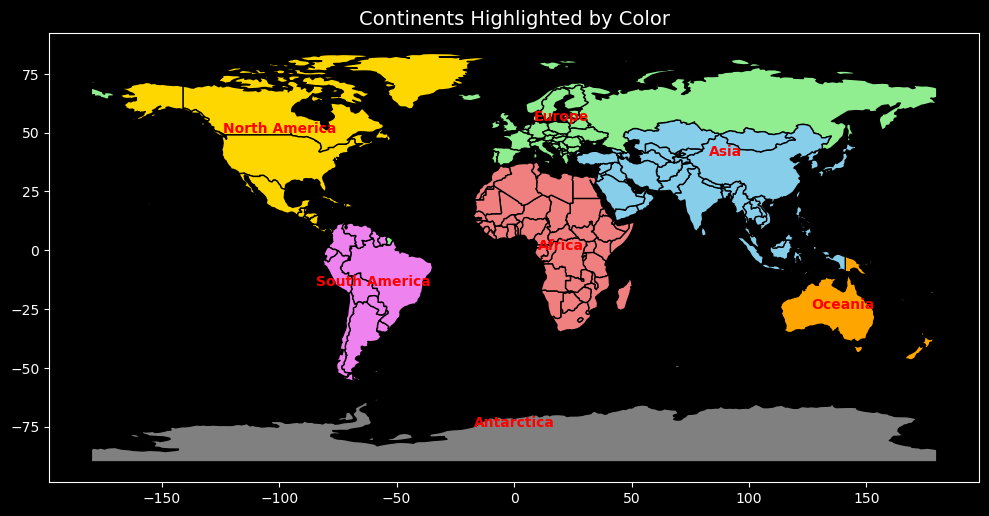

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40),
    "Africa": (20, 0),
    "Europe": (20, 55),
    "North America": (-100, 50),
    "South America": (-60, -15),
    "Oceania": (140, -25),
    "Antarctica": (0, -75)
}

# Add continent labels
for continent, (x, y) in continent_labels.items():
    ax.text(x, y, continent, fontsize=10, ha='center', fontweight='bold', color='red')

# Title
ax.set_title("Continents Highlighted by Color", fontsize=14)
plt.show()


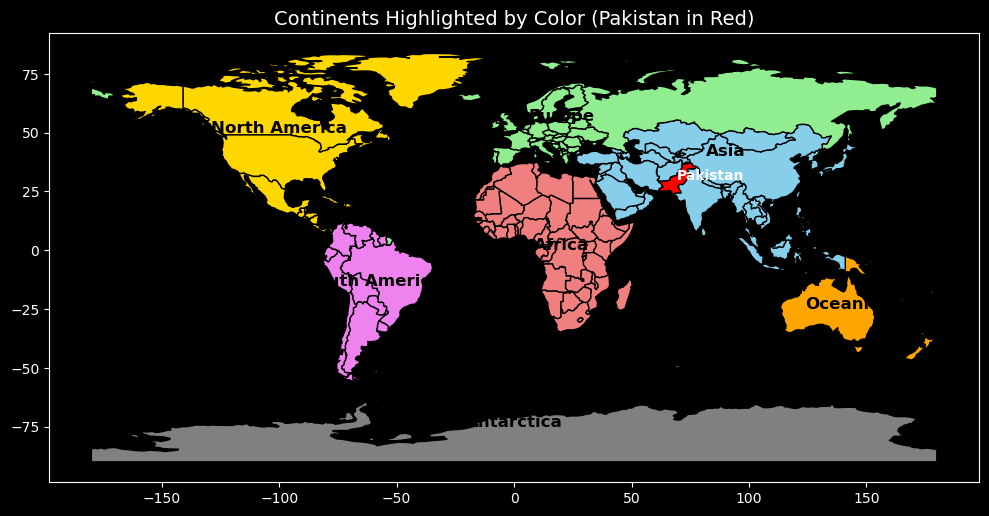

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan separately
world.loc[world["ADMIN"] == "Pakistan", "color"] = "red"

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40),
    "Africa": (20, 0),
    "Europe": (20, 55),
    "North America": (-100, 50),
    "South America": (-60, -15),
    "Oceania": (140, -25),
    "Antarctica": (0, -75)
}

# Add continent labels
for continent, (x, y) in continent_labels.items():
    ax.text(x, y, continent, fontsize=12, ha='center', fontweight='bold', color='black')

# Add label for Pakistan
pakistan = world[world["ADMIN"] == "Pakistan"]
x_pak, y_pak = pakistan.geometry.centroid.x.iloc[0], pakistan.geometry.centroid.y.iloc[0]
ax.text(x_pak, y_pak, "Pakistan", fontsize=10, ha='left', fontweight='bold', color='white')

# Title
ax.set_title("Continents Highlighted by Color (Pakistan in Red)", fontsize=14)
plt.show()


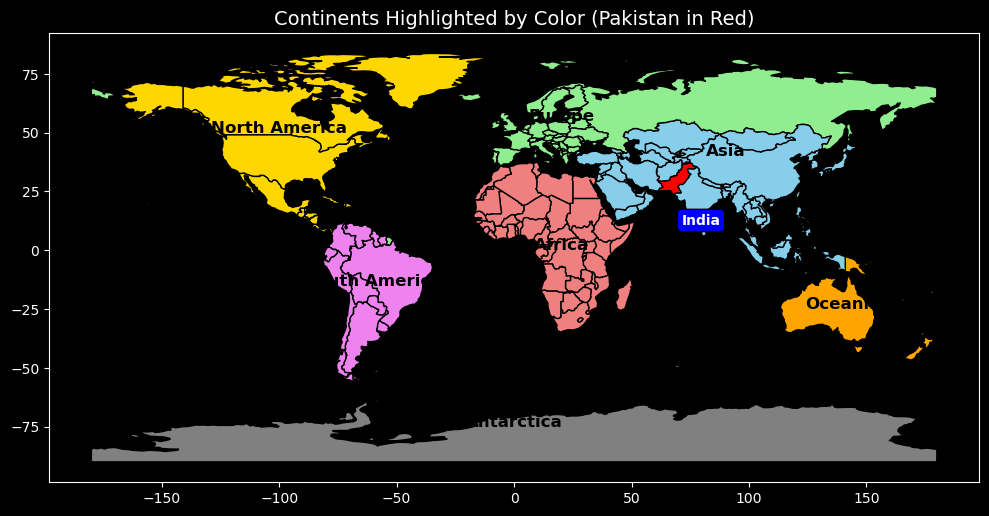

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan separately
world.loc[world["ADMIN"] == "Pakistan", "color"] = "red"

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40),
    "Africa": (20, 0),
    "Europe": (20, 55),
    "North America": (-100, 50),
    "South America": (-60, -15),
    "Oceania": (140, -25),
    "Antarctica": (0, -75)
}

# Add continent labels
for continent, (x, y) in continent_labels.items():
    ax.text(x, y, continent, fontsize=12, ha='center', fontweight='bold', color='black')

# Add label for Pakistan  and india (shifted slightly below)
India = world[world["ADMIN"] == "India"]
pakistan = world[world["ADMIN"] == "Pakistan"]
x_ind, y_ind = India.geometry.centroid.x.iloc[0], India.geometry.centroid.y.iloc[0] - 12  # Shift downward
# x_pak, y_pak = pakistan.geometry.centroid.x.iloc[0], pakistan.geometry.centroid.y.iloc[0] - 12  # Shift downward
ax.text(x_ind, y_ind, "India", fontsize=10, ha='center', fontweight='bold', color='white', bbox=dict(facecolor='blue', edgecolor='black', boxstyle='round,pad=0.3'))
# ax.text(x_pak, y_pak, "Pakistan", fontsize=10, ha='center', fontweight='bold', color='white', bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

# Title
ax.set_title("Continents Highlighted by Color (Pakistan in Red)", fontsize=14)
plt.show()


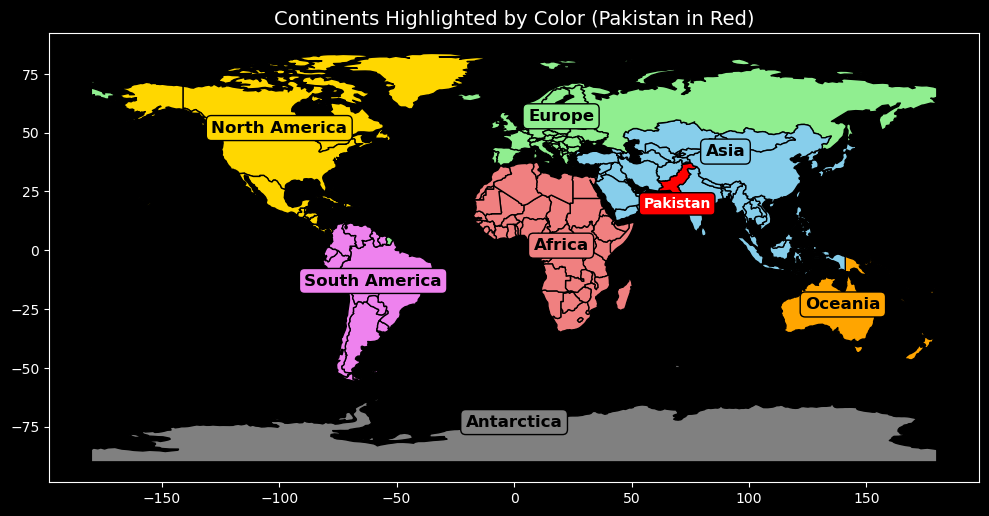

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan separately
world.loc[world["ADMIN"] == "Pakistan", "color"] = "red"

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40, "skyblue"),
    "Africa": (20, 0, "lightcoral"),
    "Europe": (20, 55, "lightgreen"),
    "North America": (-100, 50, "gold"),
    "South America": (-60, -15, "violet"),
    "Oceania": (140, -25, "orange"),
    "Antarctica": (0, -75, "gray")
}

# Add continent labels inside colored boxes
for continent, (x, y, color) in continent_labels.items():
    ax.text(
        x, y, continent, fontsize=12, ha='center', fontweight='bold', color='black',
        bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3')
    )

# Add label for Pakistan (shifted slightly below)
pakistan = world[world["ADMIN"] == "Pakistan"]
x_pak, y_pak = pakistan.geometry.centroid.x.iloc[0], pakistan.geometry.centroid.y.iloc[0] - 12  # Shift downward
ax.text(
    x_pak, y_pak, "Pakistan", fontsize=10, ha='center', fontweight='bold', color='white',
    bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3')
)

# Title
ax.set_title("Continents Highlighted by Color (Pakistan in Red)", fontsize=14)
plt.show()


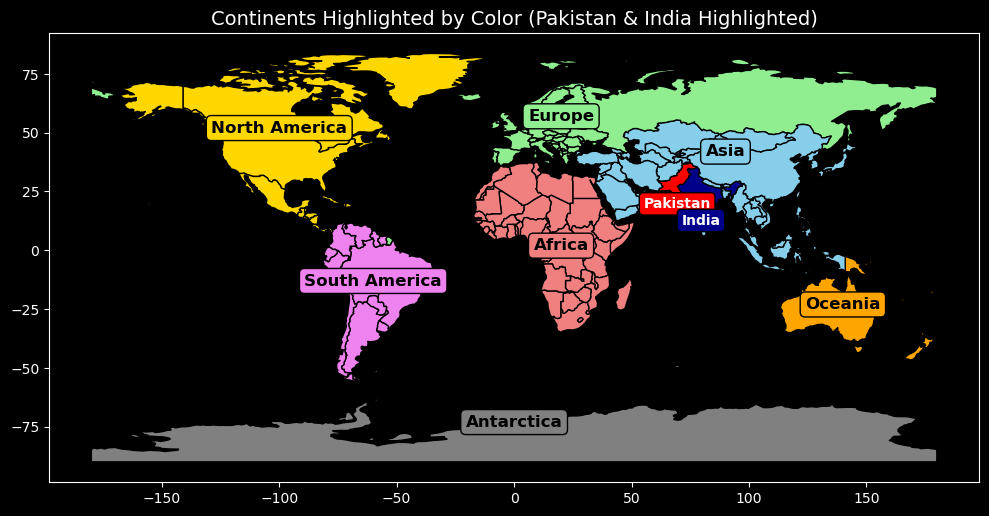

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan and India separately
world.loc[world["ADMIN"] == "Pakistan", "color"] = "red"
world.loc[world["ADMIN"] == "India", "color"] = "darkblue"

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40, "skyblue"),
    "Africa": (20, 0, "lightcoral"),
    "Europe": (20, 55, "lightgreen"),
    "North America": (-100, 50, "gold"),
    "South America": (-60, -15, "violet"),
    "Oceania": (140, -25, "orange"),
    "Antarctica": (0, -75, "gray")
}

# Add continent labels inside colored boxes
for continent, (x, y, color) in continent_labels.items():
    ax.text(
        x, y, continent, fontsize=12, ha='center', fontweight='bold', color='black',
        bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3')
    )

# Add label for Pakistan (shifted slightly below)
pakistan = world[world["ADMIN"] == "Pakistan"]
x_pak, y_pak = pakistan.geometry.centroid.x.iloc[0], pakistan.geometry.centroid.y.iloc[0] - 12
ax.text(
    x_pak, y_pak, "Pakistan", fontsize=10, ha='center', fontweight='bold', color='white',
    bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3')
)

# Add label for India (shifted slightly below)
india = world[world["ADMIN"] == "India"]
x_ind, y_ind = india.geometry.centroid.x.iloc[0], india.geometry.centroid.y.iloc[0] - 12
ax.text(
    x_ind, y_ind, "India", fontsize=10, ha='center', fontweight='bold', color='white',
    bbox=dict(facecolor='darkblue', edgecolor='black', boxstyle='round,pad=0.3')
)

# Title
ax.set_title("Continents Highlighted by Color (Pakistan & India Highlighted)", fontsize=14)
plt.show()


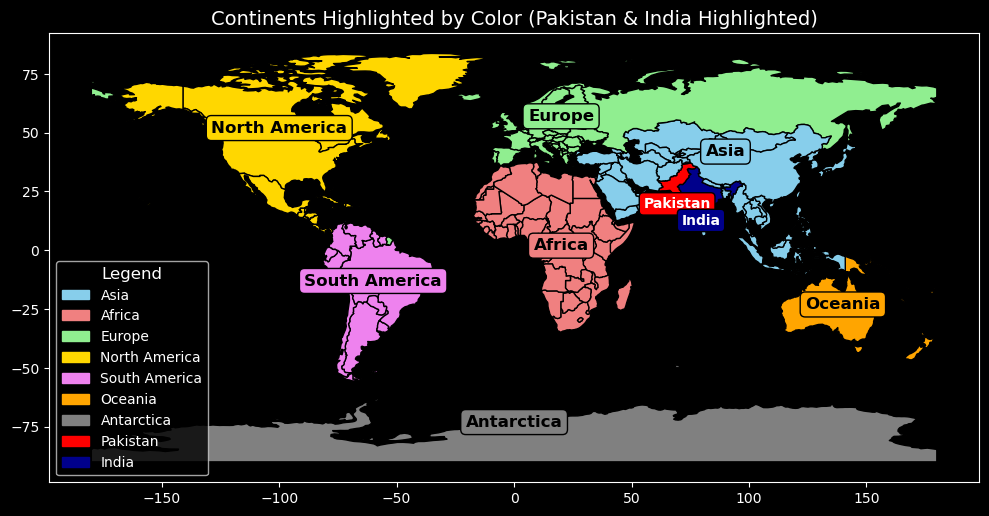

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan and India separately
world.loc[world["ADMIN"] == "Pakistan", "color"] = "red"
world.loc[world["ADMIN"] == "India", "color"] = "darkblue"

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40, "skyblue"),
    "Africa": (20, 0, "lightcoral"),
    "Europe": (20, 55, "lightgreen"),
    "North America": (-100, 50, "gold"),
    "South America": (-60, -15, "violet"),
    "Oceania": (140, -25, "orange"),
    "Antarctica": (0, -75, "gray")
}

# Add continent labels inside colored boxes
for continent, (x, y, color) in continent_labels.items():
    ax.text(
        x, y, continent, fontsize=12, ha='center', fontweight='bold', color='black',
        bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3')
    )

# Add label for Pakistan (shifted slightly below)
pakistan = world[world["ADMIN"] == "Pakistan"]
x_pak, y_pak = pakistan.geometry.centroid.x.iloc[0], pakistan.geometry.centroid.y.iloc[0] - 12
ax.text(
    x_pak, y_pak, "Pakistan", fontsize=10, ha='center', fontweight='bold', color='white',
    bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3')
)

# Add label for India (shifted slightly below)
india = world[world["ADMIN"] == "India"]
x_ind, y_ind = india.geometry.centroid.x.iloc[0], india.geometry.centroid.y.iloc[0] - 12
ax.text(
    x_ind, y_ind, "India", fontsize=10, ha='center', fontweight='bold', color='white',
    bbox=dict(facecolor='darkblue', edgecolor='black', boxstyle='round,pad=0.3')
)

# Create legend patches
legend_patches = [
    mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()
]
legend_patches.append(mpatches.Patch(color="red", label="Pakistan"))
legend_patches.append(mpatches.Patch(color="darkblue", label="India"))

# Add legend to the plot
ax.legend(handles=legend_patches, title="Legend", loc="lower left", fontsize=10, title_fontsize=12)

# Title
ax.set_title("Continents Highlighted by Color (Pakistan & India Highlighted)", fontsize=14)

plt.show()


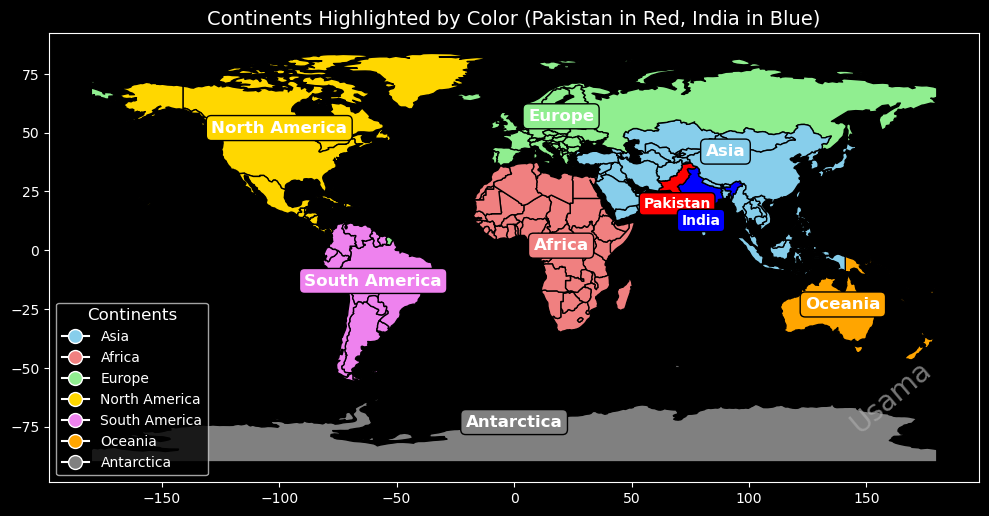

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Define continents and their colors
continent_colors = {
    "Asia": "skyblue",
    "Africa": "lightcoral",
    "Europe": "lightgreen",
    "North America": "gold",
    "South America": "violet",
    "Oceania": "orange",
    "Antarctica": "gray"
}

# Assign colors based on continent, default to 'lightgray' if continent is missing
world["color"] = world["CONTINENT"].map(continent_colors).fillna("lightgray")

# Highlight Pakistan and India separately
highlighted_countries = {"Pakistan": "red", "India": "blue"}
for country, color in highlighted_countries.items():
    world.loc[world["ADMIN"] == country, "color"] = color

# Plot the world map with colored continents
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", color=world["color"])

# Define approximate continent locations for labeling
continent_labels = {
    "Asia": (90, 40),
    "Africa": (20, 0),
    "Europe": (20, 55),
    "North America": (-100, 50),
    "South America": (-60, -15),
    "Oceania": (140, -25),
    "Antarctica": (0, -75)
}

# Add continent labels inside boxes
for continent, (x, y) in continent_labels.items():
    ax.text(x, y, continent, fontsize=12, ha='center', fontweight='bold', color='white',
            bbox=dict(facecolor=continent_colors[continent], edgecolor='black', boxstyle='round,pad=0.3'))

# Add labels for Pakistan and India
for country, color in highlighted_countries.items():
    country_data = world[world["ADMIN"] == country]
    if not country_data.empty:
        x_country, y_country = country_data.geometry.centroid.x.iloc[0], country_data.geometry.centroid.y.iloc[0] - 12
        ax.text(x_country, y_country, country, fontsize=10, ha='center', fontweight='bold', color='white',
                bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

# Add legend for continents
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cont, markersize=10, markerfacecolor=color)
           for cont, color in continent_colors.items()]
ax.legend(handles=handles, title="Continents", loc="lower left", fontsize=10, title_fontsize=12)

# Add watermark
plt.text(180, -80, "Usama", fontsize=20, color='#A9A9A9', alpha=0.7, ha='right', va='bottom', rotation=40)

# Title
ax.set_title("Continents Highlighted by Color (Pakistan in Red, India in Blue)", fontsize=14)
plt.show()



In [93]:
# Load COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')
# Convert date column to datetime format (if applicable)
df['date'] = pd.to_datetime(df['date'])
# df.head()
# Filter only 2024 patients
df_2024 = df[df['date'].dt.year == 2024]

# Get the latest available data for 2024
latest_date = df_2024['date'].max()
latest_data = df_2024[df_2024['date'] == latest_date]

# Select relevant columns
data = latest_data[['iso_code', 'location', 'total_cases']]
data = data.dropna(subset=['total_cases'])  # Drop missing values

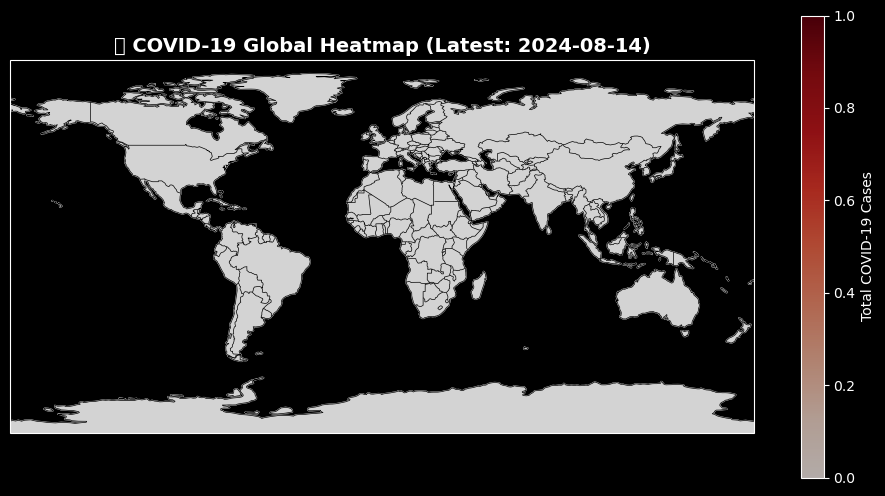

In [94]:
# Map ISO country codes to coordinates (Using a predefined dictionary)
country_coords = {
    "USA": (37.0902, -95.7129), "IND": (20.5937, 78.9629), "BRA": (-14.2350, -51.9253),
    "RUS": (61.5240, 105.3188), "CHN": (35.8617, 104.1954), "GBR": (55.3781, -3.4360),
    "FRA": (46.6034, 1.8883), "ITA": (41.8719, 12.5674), "DEU": (51.1657, 10.4515)
}

# Assign coordinates to dataset
data['latitude'] = data['iso_code'].map(lambda x: country_coords.get(x, (np.nan, np.nan))[0])
data['longitude'] = data['iso_code'].map(lambda x: country_coords.get(x, (np.nan, np.nan))[1])
data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows without coordinates

# Plot Geographical Heatmap
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add world map features
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, color="lightgray")

# Scatter plot of COVID-19 cases by country
sc = ax.scatter(data['longitude'], data['latitude'], 
                c=data['total_cases'], cmap='Reds', alpha=0.7, s=100,
                transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, ax=ax, orientation='vertical', label="Total COVID-19 Cases")
ax.set_title(f"🌍 COVID-19 Global Heatmap (Latest: {latest_date.date()})", fontsize=14, fontweight="bold")

# Show plot
plt.show()


# 👨‍💻 **About the Author**  
### **Usama Munawar**  
<p style="color:blue; font-size: 24px; font-weight: bold;">
Machine Learning & Data Science Enthusiast
</p>  

I am passionate about **Artificial Intelligence, Machine Learning, and Deep Learning**, specializing in **statistical modeling, predictive analytics, and recommendation systems**.  

## 📢 **Connect with me on Social Media**  

Click on the icons below to visit my profiles:  

<p align="center">
    <a href="https://github.com/UsamaMunawarr" target="_blank">
        <img src="https://img.icons8.com/fluent/48/000000/github.png" width="50">
    </a>
    &nbsp;&nbsp;
    <a href="https://www.linkedin.com/in/abu--usama" target="_blank">
        <img src="https://img.icons8.com/color/48/000000/linkedin.png" width="50">
    </a>
    &nbsp;&nbsp;
    <a href="https://www.youtube.com/@CodeBaseStats" target="_blank">
        <img src="https://img.icons8.com/?size=50&id=19318&format=png" width="50">
    </a>
    &nbsp;&nbsp;
    <a href="https://twitter.com/Usama__Munawar?t=Wk-zJ88ybkEhYJpWMbMheg&s=09" target="_blank">
        <img src="https://img.icons8.com/color/48/000000/twitter.png" width="50">
    </a>
    &nbsp;&nbsp;
    <a href="https://www.facebook.com/profile.php?id=100005320726463&mibextid=9R9pXO" target="_blank">
        <img src="https://img.icons8.com/color/48/000000/facebook-new.png" width="50">
    </a>
</p>
